In [1]:
import numpy as np
import pandas as pd
import root_pandas as rp
import uproot as ur
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import ROOT
import new_analysis
import array
import matplotlib
matplotlib.rcParams['text.usetex'] = False

Welcome to JupyROOT 6.22/02


/home/jeef/anaconda3/envs/my_root_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/jeef/workspace/jeff_workspace/analysis/phase3/new_analysis.py:270: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  means[col]=0 #will be deleted at the end. Used so we can append rows of means
/home/jeef/workspace/jeff_workspace/analysis/phase3/new_analysis.py:271: SettingWithCopyWarning: 
A value is trying 

In [2]:
a = new_analysis.analysis()

/home/jeef/workspace/jeff_workspace/analysis/phase3/new_analysis.py:270: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  means[col]=0 #will be deleted at the end. Used so we can append rows of means
/home/jeef/workspace/jeff_workspace/analysis/phase3/new_analysis.py:271: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errs[col] = 0
/home/jeef/workspace/jeff_workspace/analysis/phase3/new_analysis.py:270: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [3]:
LER_cont_inj = a.get_tpc_data_during_study_period("LER", "Cont_inj")
LER_decay = a.get_tpc_data_during_study_period("LER", "Decay")
HER_cont_inj = a.get_tpc_data_during_study_period("HER", "Cont_inj")
HER_decay = a.get_tpc_data_during_study_period("HER", "Decay")
Lumi_cont_inj = a.get_tpc_data_during_study_period("Lumi", "Cont_inj")
Lumi_decay = a.get_tpc_data_during_study_period("Lumi", "Decay")
Lumi = {}
HER = {}
LER = {}
Single_beam = {}
for tpc in Lumi_decay.keys():
    Lumi[tpc] = Lumi_decay[tpc].append(Lumi_cont_inj[tpc])
    HER[tpc] = HER_decay[tpc].append(HER_cont_inj[tpc])
    LER[tpc] = LER_decay[tpc].append(LER_cont_inj[tpc])
    Single_beam[tpc] = LER[tpc].append(HER[tpc])
    
    #Lumi[tpc] = Lumi_cont_inj[tpc]
    #HER[tpc] = HER_cont_inj[tpc]
    #LER[tpc] = LER_cont_inj[tpc]
    #Single_beam[tpc] = LER[tpc].append(HER[tpc])
    
    Lumi[tpc].index = [i for i in range(0,len(Lumi[tpc]))]
    Single_beam[tpc].index = [i for i in range(0,len(Single_beam[tpc]))]
MC = a.apply_energy_calibrations_to_MC()

/home/jeef/anaconda3/envs/my_root_env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


elepaio 86


### Apply "xray veto" cuts for MC

In [4]:
for tpc in MC.keys():
    MC[tpc] = MC[tpc].loc[MC[tpc]['reco_energy']>8]
    MC[tpc].index = [i for i in range(0,len(MC[tpc]))]

# Fold phi for angular analysis

In [5]:
for tpc in ['elepaio', 'tako', 'palila', 'iiwi', 'nene', 'humu']:
    Lumi[tpc]['phi_fold'] = Lumi[tpc]['phi'].apply(lambda x: x if x <= 90 else 180-x)
    Lumi[tpc]['phi_fold'] = Lumi[tpc]['phi_fold'].apply(lambda x: x if x >= -90 else -180-x)
    HER[tpc]['phi_fold'] = HER[tpc]['phi'].apply(lambda x: x if x <= 90 else 180-x)
    HER[tpc]['phi_fold'] = HER[tpc]['phi_fold'].apply(lambda x: x if x >= -90 else -180-x)
    LER[tpc]['phi_fold'] = LER[tpc]['phi'].apply(lambda x: x if x <= 90 else 180-x)
    LER[tpc]['phi_fold'] = LER[tpc]['phi_fold'].apply(lambda x: x if x >= -90 else -180-x)
    Single_beam[tpc]['phi_fold'] = Single_beam[tpc]['phi'].apply(lambda x: x if x <= 90 else 180-x)
    Single_beam[tpc]['phi_fold'] = Single_beam[tpc]['phi_fold'].apply(lambda x: x if x >= -90 else -180-x)
    MC[tpc]['phi_fold'] = (MC[tpc]['fit_phi']*180/np.pi).apply(lambda x: x if x <= 90 else 180-x)
    MC[tpc]['phi_fold'] = MC[tpc]['phi_fold'].apply(lambda x: x if x >= -90 else -180-x)

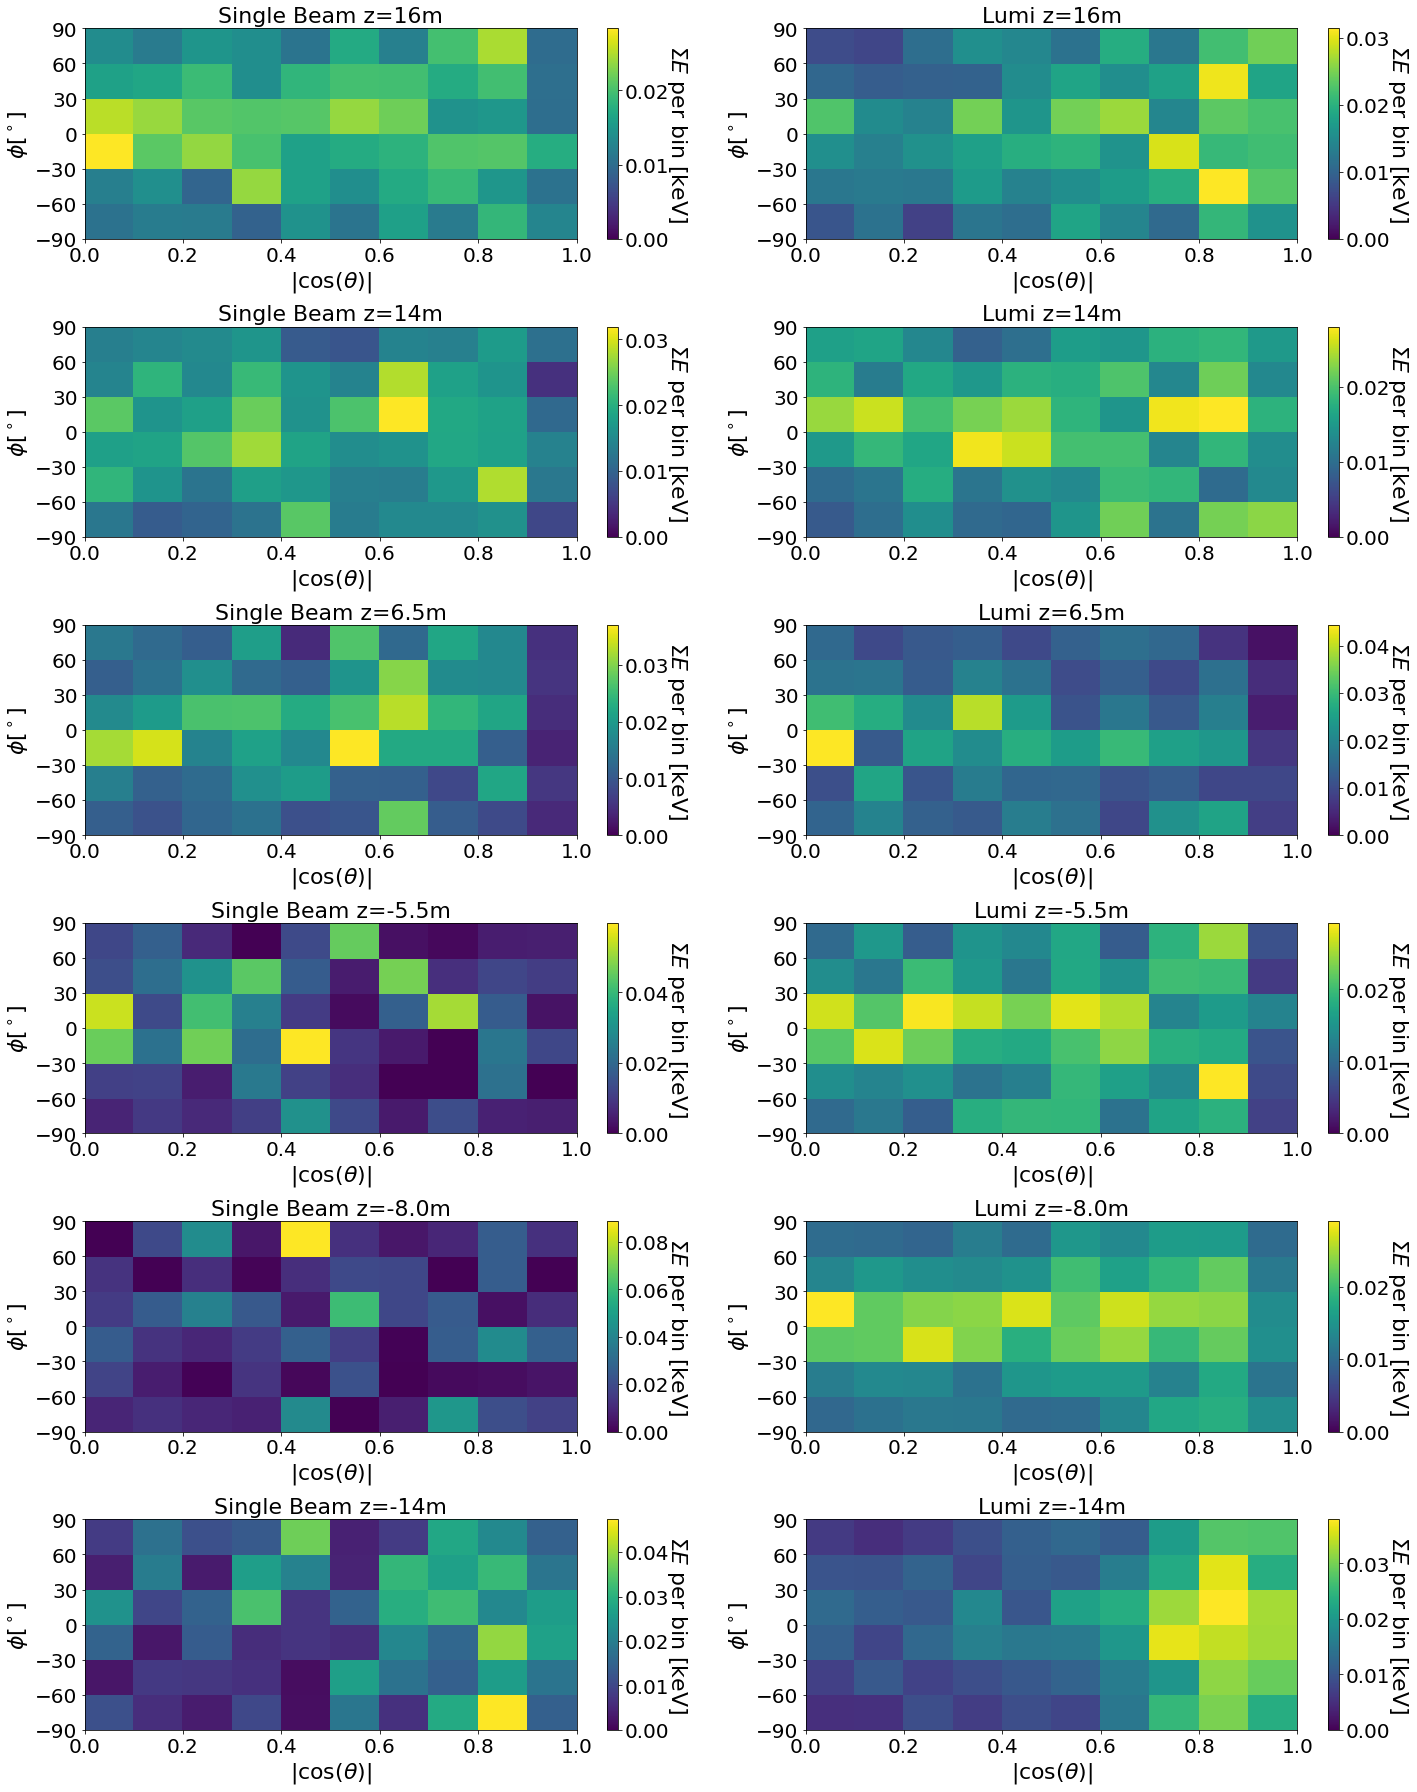

In [7]:
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=22)
plt.rc('axes', titlesize=22)
plt.figure(figsize = (20,25))
i = 1
j=1
pos = ['z=16m', 'z=14m', 'z=6.5m', 'z=-5.5m', 'z=-8.0m', 'z=-14m']
for tpc in ['humu', 'nene', 'iiwi', 'palila', 'tako', 'elepaio']:
    plt.subplot(6,2,i+1)
    a1,b1,c1,d1 = plt.hist2d(np.abs(np.cos(Lumi[tpc]['theta']*np.pi/180)), Lumi[tpc]['phi_fold'], bins=(10,6), range=((0,1),(-90,90)), weights=Lumi[tpc]['track_energy']/Lumi[tpc]['track_energy'].sum(), density=None, vmin = 0)
    plt.colorbar(d1).set_label(r'$\Sigma E$ per bin [keV]', rotation = 270, labelpad = 20)
    plt.title('Lumi ' + pos[j-1])
    plt.yticks([-90,-60,-30,0,30,60,90])
    plt.ylabel(r'$\phi[^\circ]$')
    plt.xlabel(r'$|\cos(\theta)|$')
    plt.subplot(6,2,i)
    a2,b2,c2,d2 = plt.hist2d(np.abs(np.cos(Single_beam[tpc]['theta']*np.pi/180)), Single_beam[tpc]['phi_fold'], bins=(10,6), range=((0,1),(-90,90)), weights=Single_beam[tpc]['track_energy']/Single_beam[tpc]['track_energy'].sum(), density=None, vmin = 0)
    plt.colorbar(d2).set_label(r'$\Sigma E$ per bin [keV]', rotation = 270, labelpad = 20)
    plt.title('Single Beam ' + pos[j-1])
    plt.yticks([-90,-60,-30,0,30,60,90])
    plt.ylabel(r'$\phi[^\circ]$')
    plt.xlabel(r'$|\cos(\theta)|$')
    i+=2
    j+=1
plt.tight_layout()
plt.show()

In [10]:
MC_Lumi = {}
MC_SB = {}
tpcs = ['palila', 'iiwi', 'tako', 'nene', 'elepaio', 'humu']
for tpc in tpcs:
    MC_Lumi[tpc] = MC[tpc].loc[(MC[tpc]['bgType'] == 'RBB_Lumi') | (MC[tpc]['bgType'] == 'twoPhoton_Lumi')]
    MC_SB[tpc] = MC[tpc].loc[(MC[tpc]['bgType'] != 'RBB_Lumi') & (MC[tpc]['bgType'] != 'twoPhoton_Lumi')]
    MC_Lumi[tpc] = MC_Lumi[tpc].loc[((MC_Lumi[tpc]['truth_mother_Z']>-870) & #Line is for RBB hotspot
               (MC_Lumi[tpc]['truth_mother_Z']<-750) & (MC_Lumi[tpc]['truth_mother_X']>20) &
                                       (MC_Lumi[tpc]['truth_mother_X']<60) &
                                       (np.abs(MC_Lumi[tpc]['truth_mother_Y'])<20))
                                      |                                
                                      (MC_Lumi[tpc]['truth_mother_Z']>1390) &
                                      (MC_Lumi[tpc]['truth_mother_Z']<1680) &
                                      (MC_Lumi[tpc]['truth_mother_X']<80) &
                                      (MC_Lumi[tpc]['truth_mother_X']>30) &
                                      (np.abs(MC_Lumi[tpc]['truth_mother_Y'])<20)] #FWD and BWD hotspots

### Scale MC

In [318]:
Scaled_MC = {}
factors = {'Coulomb_LER_base' : 1/4., 'Coulomb_LER_dynamic' : 1/4., 
           'Coulomb_HER_base' : 1/40., 'Coulomb_HER_dynamic' : 1/40.,
          'Brems_LER_base' : 1/40., 'Brems_LER_dynamic' : 1/40., 
           'Brems_HER_base' : 1/400., 'Brems_HER_dynamic' : 1/400.,
          'Touschek_LER_all' : 2.5, 'Touschek_HER_all' : 1.25,
          'RBB_Lumi' : 1/1.4e-3, 'twoPhoton_Lumi' : 100.}
for tpc in tpcs:
    Scaled_MC[tpc] = MC[tpc][['reco_energy','fit_theta','phi_fold', 'truth_mother_X', 'truth_mother_Y', 'truth_mother_Z']]
    Scaled_MC[tpc]['ones'] = 1
for tpc in tpcs:
    for key in factors.keys():
        index = MC[tpc].loc[(MC[tpc]['bgType'] == key)].index.to_numpy()
        for val in index:
            #Scaled_MC[tpc]['reco_energy'].iloc[val] = factors[key]*Scaled_MC[tpc]['reco_energy'].iloc[val]
            Scaled_MC[tpc]['ones'].iloc[val] = factors[key]*Scaled_MC[tpc]['ones'].iloc[val]


<ipython-input-318-2b46fa7a5fb3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Scaled_MC[tpc]['ones'] = 1
/home/jeef/anaconda3/envs/my_root_env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-318-2b46fa7a5fb3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Scale

### Start with KS test for uniformity
We find that the cos(theta) distributions are not uniform, thus we have directionality

In [194]:
from scipy import stats

print('TPC       |   Sample       |   p-value')
print('------------------------------------------------------')
for tpc in tpcs:
    Lumi_tmp = Lumi[tpc].loc[np.abs(Lumi[tpc]['phi_fold'])<100]
    MC_tmp = MC[tpc].loc[np.abs(MC[tpc]['phi_fold'])<100]
    SB_tmp = Single_beam[tpc].loc[np.abs(Single_beam[tpc]['phi_fold'])<100]
    result_lumi = stats.kstest(np.abs(np.cos(Lumi_tmp['theta']*np.pi/180)), 'uniform', alternative='two_sided')
    result_MC = stats.kstest(np.abs(np.cos(MC_tmp['fit_theta'])), 'uniform', alternative='two_sided')
    result_SB = stats.kstest(np.abs(np.cos(SB_tmp['theta']*np.pi/180)), 'uniform', alternative='two_sided')
    if len(tpc) == 4:
        print('%s      |   lumi_exp     |   %s'%(tpc, result_lumi[1]))
        print('%s      |   MC           |   %s'%(tpc, result_MC[1]))
        print('%s      |   single beam  |   %s'%(tpc, result_SB[1]))
    elif len(tpc) == 6:
        print('%s    |   lumi_exp     |   %s'%(tpc, result_lumi[1]))
        print('%s    |   MC           |   %s'%(tpc, result_MC[1]))
        print('%s    |   single beam  |   %s'%(tpc, result_SB[1]))
    else:
        print('%s   |   lumi_exp     |   %s'%(tpc, result_lumi[1]))
        print('%s   |   MC           |   %s'%(tpc, result_MC[1]))
        print('%s   |   single beam  |   %s'%(tpc, result_SB[1]))

TPC       |   Sample       |   p-value
------------------------------------------------------
palila    |   lumi_exp     |   9.393453593338146e-125
palila    |   MC           |   7.458080132757331e-24
palila    |   single beam  |   4.2039604312037234e-20
iiwi      |   lumi_exp     |   1.2282782417850039e-67
iiwi      |   MC           |   1.0379632096675402e-27
iiwi      |   single beam  |   1.3338809561164272e-40
tako      |   lumi_exp     |   2.078606293721364e-140
tako      |   MC           |   3.3075688374379495e-54
tako      |   single beam  |   3.2679946608467674e-05
nene      |   lumi_exp     |   7.035448723908017e-22
nene      |   MC           |   3.6454715945273717e-32
nene      |   single beam  |   3.987298837485315e-46
elepaio   |   lumi_exp     |   3.959973755835199e-162
elepaio   |   MC           |   3.686911079925869e-21
elepaio   |   single beam  |   3.0580032036207794e-07
humu      |   lumi_exp     |   4.7486823591426435e-07
humu      |   MC           |   4.4267317592978

### Bin and normalize energy-weighted data to find regions with most directionality

theta
(0.0, 0.1]    118
(0.1, 0.2]    122
(0.2, 0.3]    151
(0.3, 0.4]    138
(0.4, 0.5]    132
(0.5, 0.6]    147
(0.6, 0.7]    127
(0.7, 0.8]    109
(0.8, 0.9]    115
(0.9, 1.0]     49
Name: ones, dtype: int64
theta
(0.0, 0.1]    76
(0.1, 0.2]    67
(0.2, 0.3]    60
(0.3, 0.4]    77
(0.4, 0.5]    64
(0.5, 0.6]    58
(0.6, 0.7]    61
(0.7, 0.8]    54
(0.8, 0.9]    53
(0.9, 1.0]    25
Name: ones, dtype: int64
theta
(0.0, 0.1]    512
(0.1, 0.2]    488
(0.2, 0.3]    508
(0.3, 0.4]    532
(0.4, 0.5]    534
(0.5, 0.6]    514
(0.6, 0.7]    538
(0.7, 0.8]    472
(0.8, 0.9]    477
(0.9, 1.0]    267
Name: ones, dtype: int64
theta
(0.0, 0.1]    109
(0.1, 0.2]    123
(0.2, 0.3]    120
(0.3, 0.4]    127
(0.4, 0.5]    150
(0.5, 0.6]    123
(0.6, 0.7]    131
(0.7, 0.8]     98
(0.8, 0.9]    120
(0.9, 1.0]     75
Name: ones, dtype: int64
theta
(0.0, 0.1]    172
(0.1, 0.2]    191
(0.2, 0.3]    203
(0.3, 0.4]    212
(0.4, 0.5]    229
(0.5, 0.6]    259
(0.6, 0.7]    334
(0.7, 0.8]    443
(0.8, 0.9]    56

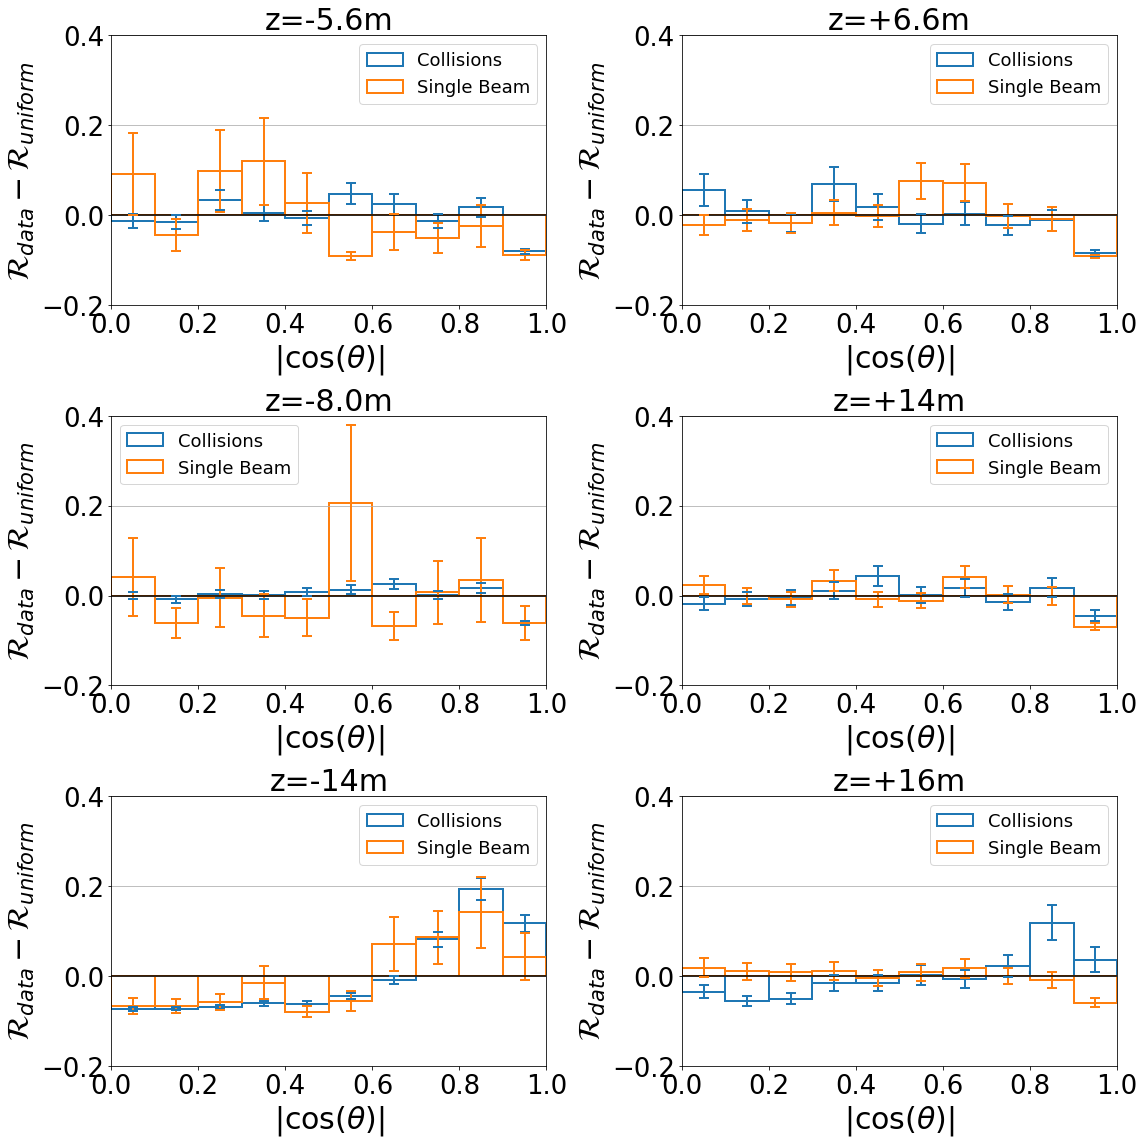

In [337]:
nbins = 11
width = 1/(nbins-1)
center = [(width*i)+width/2 for i in range(0,nbins-1)]
tpcs = ['palila', 'iiwi', 'tako', 'nene', 'elepaio', 'humu']
pos = ['z=-5.6m', 'z=+6.6m', 'z=-8.0m', 'z=+14m', 'z=-14m', 'z=+16m']
fig = plt.figure(figsize=(16,16))
plt.rc('legend', fontsize=18)
plt.rc('xtick', labelsize=26)
plt.rc('ytick', labelsize=26)
plt.rc('axes', labelsize=30)
plt.rc('axes', titlesize=30)
i=1
j=1
for tpc in tpcs:
    Lumi[tpc]['ones'] = 1
    Single_beam[tpc]['ones'] = 1
    Lumi_tmp = Lumi[tpc].loc[np.abs(Lumi[tpc]['phi_fold'])<60]
    MC_tmp = Scaled_MC[tpc].loc[np.abs(Scaled_MC[tpc]['phi_fold'])<60]
    SB_tmp = Single_beam[tpc].loc[np.abs(Single_beam[tpc]['phi_fold'])<60]
    
    Lumi_tmp = Lumi_tmp.loc[Lumi_tmp['track_energy']>40]
    MC_tmp = MC_tmp.loc[MC_tmp['reco_energy']>40]
    SB_tmp = SB_tmp.loc[SB_tmp['track_energy']>40]
    
    test = Lumi_tmp.groupby(pd.cut(np.abs(np.cos(Lumi_tmp['theta']*np.pi/180)), bins = np.linspace(0,1,nbins))).sum()
    test_MC = MC_tmp.groupby(pd.cut(np.abs(np.cos(MC_tmp['fit_theta'])), bins = np.linspace(0,1,nbins))).sum()
    test_SB = SB_tmp.groupby(pd.cut(np.abs(np.cos(SB_tmp['theta']*np.pi/180)), bins = np.linspace(0,1,nbins))).sum()
    
    plt.subplot(3,2,i)
        
    plt.bar(center, ((test['ones']*test['track_energy'])/((test['ones']*test['track_energy']).sum()))-(np.array([1 for i in range(0,len(test))])/len(test)), yerr = 1.96*np.sqrt(np.sqrt(test['ones'])*test['track_energy'])**2/(test['track_energy']*test['ones']).sum(), width = width, label = 'Collisions', fc = 'None', ec = 'tab:blue', lw = 2,error_kw=dict(ecolor='tab:blue', lw=2, capsize=5, capthick=2))
    plt.bar(center, ((test_SB['ones']*test_SB['track_energy'])/((test_SB['ones']*test_SB['track_energy']).sum()))-(np.array([1 for i in range(0,len(test_SB))])/len(test_SB)), yerr = 1.96*np.sqrt(np.sqrt(test_SB['ones'])*test_SB['track_energy'])**2/(test_SB['track_energy']*test_SB['ones']).sum(), width = width, label = 'Single Beam', fc = 'None', ec = 'tab:orange', lw=2,error_kw=dict(ecolor='tab:orange', lw=2, capsize=5, capthick=2))
    plt.hlines(0,0,1,color = 'k')
    plt.ylabel(r'$\mathcal{R}_{data} - \mathcal{R}_{uniform}$')
    plt.xlabel(r'$|\cos(\theta)|$')
    plt.xlim(0,1)
    #plt.ylim(-0.1,0.1)
    plt.title(pos[j-1])
    plt.legend(ncol=1)
    print(test['ones'])
    
    #plt.subplot(6,2,i)
    #plt.bar(center, (test_SB['track_energy']/test_SB['track_energy'].sum())-(np.array([1 for i in range(0,len(test))])/len(test)), yerr = np.sqrt(test_SB['ones']*test_SB['track_energy']/test_SB['track_energy'].sum()**2 + (1/(10*len(test)))**2), width = width, label = '', fc = 'None', ec = 'tab:blue')
    #plt.bar(center, (test_MC['reco_energy']/test_MC['reco_energy'].sum())-(np.array([1 for i in range(0,len(test))])/len(test)), yerr = np.sqrt(test['ones']*test_MC['reco_energy']/test_MC['reco_energy'].sum()**2), width = width, label = '', fc = 'None', ec = 'tab:blue')
    #plt.hlines(0,0,1,color = 'k')
    #plt.xlim(0,1)
    plt.ylim(-0.2,0.4)
    plt.grid(axis='y')
    #plt.ylabel(r'$\mathcal{O}_{SB,data} - \mathcal{O}_{uniform}$')
    #plt.xlabel(r'$|\cos(\theta)|$')
    #plt.title(pos[j-1] + ' Single Beam Data')
    j+=1
    i+=1
plt.tight_layout()
plt.savefig('directional_distributions.jpg')
plt.show()
#np.sqrt((test_err/test['track_energy'].sum())**2+(test_MC_err/test_MC['reco_energy'].sum())**2)

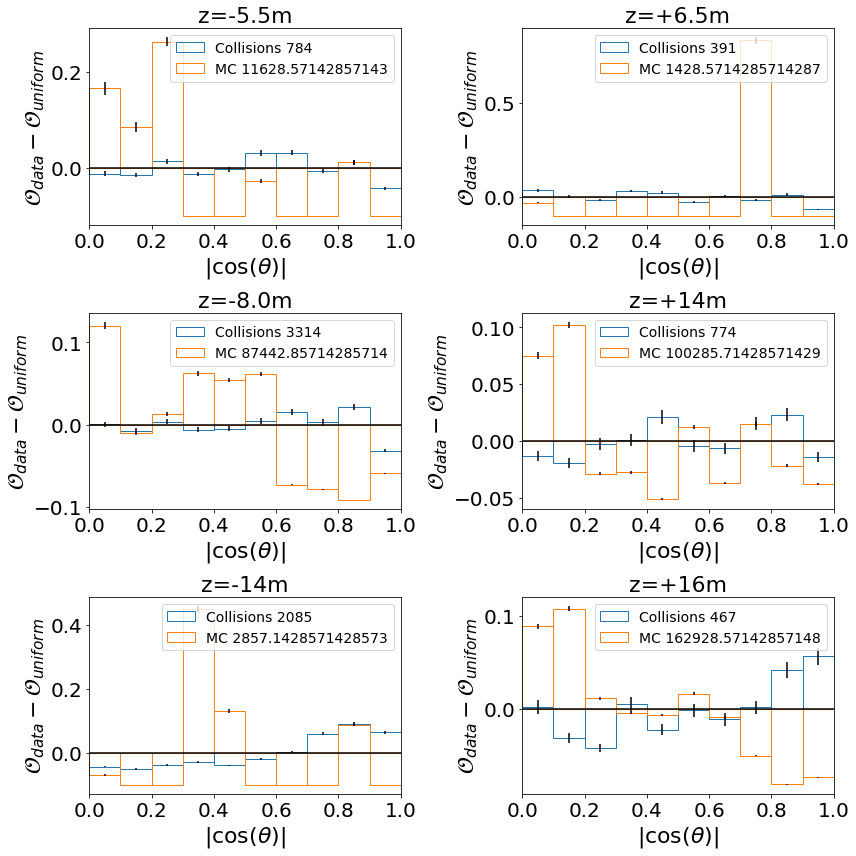

In [259]:
nbins = 11
width = 1/(nbins-1)
center = [(width*i)+width/2 for i in range(0,nbins-1)]
#nbins = 11
#width = 2/(nbins-1)
#center = [-1+(width*i)+width/2 for i in range(0,nbins-1)]
tpcs = ['palila', 'iiwi', 'tako', 'nene', 'elepaio', 'humu']
pos = ['z=-5.5m', 'z=+6.5m', 'z=-8.0m', 'z=+14m', 'z=-14m', 'z=+16m']
plt.figure(figsize = (12,12))
i=1
j=1
for tpc in tpcs:
    Lumi[tpc]['ones'] = 1
    Single_beam[tpc]['ones'] = 1
    Lumi_tmp = Lumi[tpc].loc[np.abs(Lumi[tpc]['phi_fold'])<45]
    MC_tmp = Scaled_MC[tpc].loc[np.abs(Scaled_MC[tpc]['phi_fold'])<45]
    SB_tmp = Single_beam[tpc].loc[np.abs(Single_beam[tpc]['phi_fold'])<45]
    
    Lumi_tmp = Lumi_tmp.loc[Lumi_tmp['track_energy']>60]
    MC_tmp = MC_tmp.loc[MC_tmp['reco_energy']>60]
    SB_tmp = SB_tmp.loc[SB_tmp['track_energy']>60]
    
    ### Add MC lumi cuts ###
    
    MC_tmp = MC_tmp.loc[((MC_tmp['truth_mother_Z']>-870) & #Line is for RBB hotspot
               (MC_tmp['truth_mother_Z']<-750) & (MC_tmp['truth_mother_X']>20) &
                                       (MC_tmp['truth_mother_X']<60) &
                                       (np.abs(MC_tmp['truth_mother_Y'])<20))
                                      |                                
                                      (MC_tmp['truth_mother_Z']>1390) &
                                      (MC_tmp['truth_mother_Z']<1680) &
                                      (MC_tmp['truth_mother_X']<80) &
                                      (MC_tmp['truth_mother_X']>30) &
                                      (np.abs(MC_tmp['truth_mother_Y'])<20)] #FWD and BWD hotspots
    
    ###                  ###
    
    test = Lumi_tmp.groupby(pd.cut(np.abs(np.cos(Lumi_tmp['theta']*np.pi/180)), bins = np.linspace(0,1,nbins))).sum()
    test_MC = MC_tmp.groupby(pd.cut(np.abs(np.cos(MC_tmp['fit_theta'])), bins = np.linspace(0,1,nbins))).sum()
    test_SB = SB_tmp.groupby(pd.cut(np.abs(np.cos(SB_tmp['theta']*np.pi/180)), bins = np.linspace(0,1,nbins))).sum()
    
    plt.subplot(3,2,i)
        
    plt.bar(center, (test['track_energy']/test['track_energy'].sum())-(np.array([1 for i in range(0,len(test))])/len(test)), yerr = 1.96*np.sqrt(np.sqrt(test['ones'])*test['track_energy']/test['track_energy'].sum()**2), width = width, label = 'Collisions %s'%(test['ones'].sum()), fc = 'None', ec = 'tab:blue')
    plt.bar(center, (test_MC['reco_energy']/test_MC['reco_energy'].sum())-(np.array([1 for i in range(0,len(test_MC))])/len(test_MC)), yerr = 1.96*np.sqrt(np.sqrt(test_MC['ones'])*test_MC['reco_energy']/test_MC['reco_energy'].sum()**2), width = width, label = 'MC %s'%(test_MC['ones'].sum()), fc = 'None', ec = 'tab:orange')
    plt.hlines(0,0,1,color = 'k')
    plt.ylabel(r'$\mathcal{O}_{data} - \mathcal{O}_{uniform}$')
    plt.xlabel(r'$|\cos(\theta)|$')
    plt.xlim(0,1)
    #plt.ylim(-0.1,0.1)
    plt.title(pos[j-1])
    plt.legend()
    
    #plt.subplot(6,2,i)
    #plt.bar(center, (test_SB['track_energy']/test_SB['track_energy'].sum())-(np.array([1 for i in range(0,len(test))])/len(test)), yerr = np.sqrt(test_SB['ones']*test_SB['track_energy']/test_SB['track_energy'].sum()**2 + (1/(10*len(test)))**2), width = width, label = '', fc = 'None', ec = 'tab:blue')
    #plt.bar(center, (test_MC['reco_energy']/test_MC['reco_energy'].sum())-(np.array([1 for i in range(0,len(test))])/len(test)), yerr = np.sqrt(test['ones']*test_MC['reco_energy']/test_MC['reco_energy'].sum()**2), width = width, label = '', fc = 'None', ec = 'tab:blue')
    #plt.hlines(0,0,1,color = 'k')
    #plt.xlim(0,1)
    #plt.ylim(-0.1,0.1)
    #plt.ylabel(r'$\mathcal{O}_{SB,data} - \mathcal{O}_{uniform}$')
    #plt.xlabel(r'$|\cos(\theta)|$')
    #plt.title(pos[j-1] + ' Single Beam Data')
    j+=1
    i+=1
plt.tight_layout()
plt.show()
#np.sqrt((test_err/test['track_energy'].sum())**2+(test_MC_err/test_MC['reco_energy'].sum())**2)

In [252]:
min_l = 1e11
max_l = 0
min_s = 1e11
max_s = 0
for tpc in tpcs:
    q = Lumi[tpc]['timestamp_start'].to_numpy()
    r = Single_beam[tpc]['timestamp_start'].to_numpy()
    for val in q:
        if val < min_l:
            min_l = val
        if val > max_l:
            max_l = val
    for other in r:
        if other < min_s:
            min_s = other
        if other > max_s:
            max_s = other
dt_l = max_l-min_l
dt_s = max_s-min_s
scale = dt_s/dt_l
print(scale)

2.5502362566215924


<ipython-input-301-95b0ccc14718>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Scaled_MC[tpc]['counts'] = 1
<ipython-input-301-95b0ccc14718>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Scaled_MC[tpc]['counts'] = 1
<ipython-input-301-95b0ccc14718>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

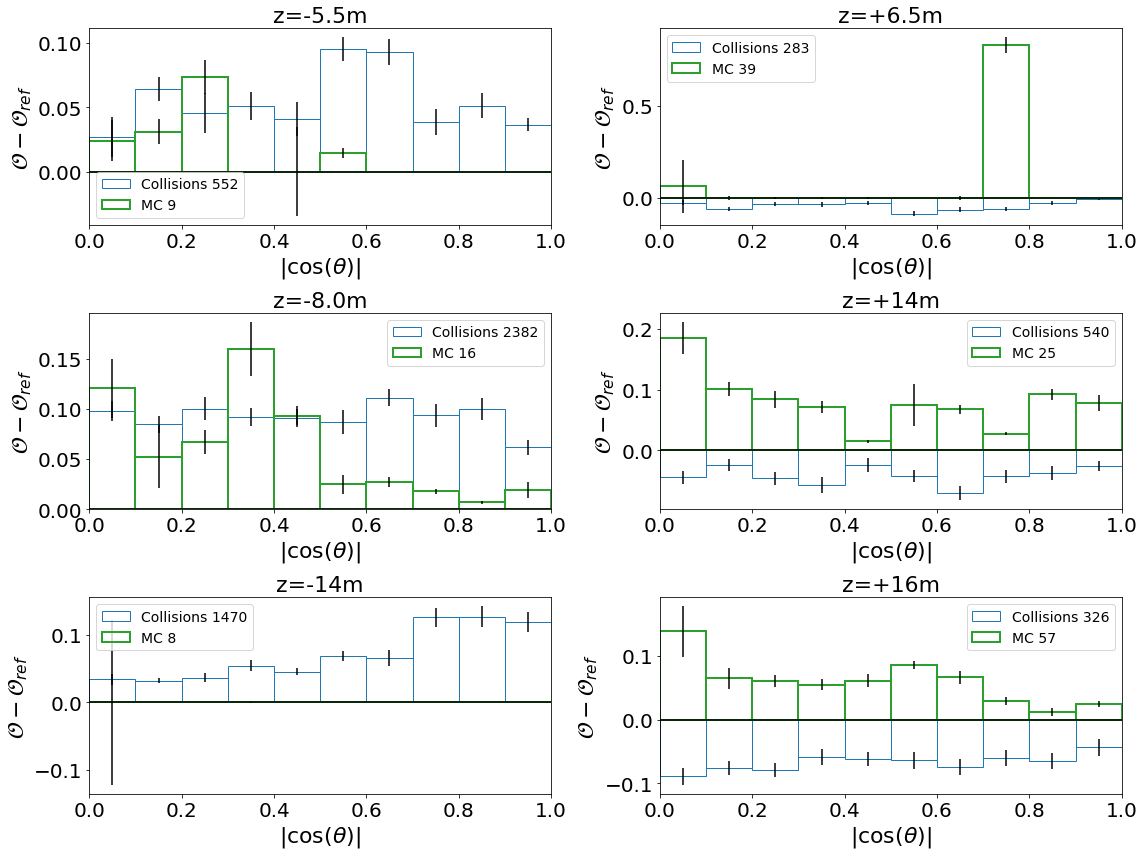

In [301]:
nbins = 11
width = 1/(nbins-1)
center = [(width*i)+width/2 for i in range(0,nbins-1)]
#nbins = 11
#width = 2/(nbins-1)
#center = [-1+(width*i)+width/2 for i in range(0,nbins-1)]
tpcs = ['palila', 'iiwi', 'tako', 'nene', 'elepaio', 'humu']
pos = ['z=-5.5m', 'z=+6.5m', 'z=-8.0m', 'z=+14m', 'z=-14m', 'z=+16m']
plt.figure(figsize = (16,12))
i=1
j=1
for tpc in tpcs:
    Lumi[tpc]['ones'] = 1
    Single_beam[tpc]['ones'] = 1
    Scaled_MC[tpc]['counts'] = 1
    Lumi_tmp = Lumi[tpc].loc[np.abs(Lumi[tpc]['phi_fold'])<30]
    MC_tmp = Scaled_MC[tpc].loc[np.abs(Scaled_MC[tpc]['phi_fold'])<30]
    SB_tmp = Single_beam[tpc].loc[np.abs(Single_beam[tpc]['phi_fold'])<30]
    
    Lumi_tmp = Lumi_tmp.loc[Lumi_tmp['track_energy']>60]
    MC_tmp = MC_tmp.loc[MC_tmp['reco_energy']>60]
    MC_tmp2 = MC_tmp.loc[MC_tmp['reco_energy']>60]
    SB_tmp = SB_tmp.loc[SB_tmp['track_energy']>60]
    
    ### Add MC lumi cuts ###
    
    #MC_tmp = MC_tmp.loc[((MC_tmp['truth_mother_Z']>-870) & #Line is for RBB hotspot
    #           (MC_tmp['truth_mother_Z']<-750) & (MC_tmp['truth_mother_X']>20) &
    #                                   (MC_tmp['truth_mother_X']<60) &
    #                                   (np.abs(MC_tmp['truth_mother_Y'])<20))
    #                                  |                                
    #                                  (MC_tmp['truth_mother_Z']>1390) &
    #                                  (MC_tmp['truth_mother_Z']<1680) &
    #                                  (MC_tmp['truth_mother_X']<80) &
    #                                  (MC_tmp['truth_mother_X']>30) &
    #                                  (np.abs(MC_tmp['truth_mother_Y'])<20)] #FWD and BWD hotspots
    
    ###                  ###
    
    ### Add cuts for everything outside of lumi region ###
    
    MC_tmp = MC_tmp.loc[((MC_tmp['truth_mother_Z']<=-870) | #Line is for RBB hotspot
               (MC_tmp['truth_mother_Z']>-750) | (MC_tmp['truth_mother_X']<=20) |
                                       (MC_tmp['truth_mother_X']>60) |
                                       (np.abs(MC_tmp['truth_mother_Y'])>=20))
                                      &                                
                                      (MC_tmp['truth_mother_Z']<=1390) |
                                      (MC_tmp['truth_mother_Z']>1680) |
                                      (MC_tmp['truth_mother_X']>=80) |
                                      (MC_tmp['truth_mother_X']<30) |
                                      (np.abs(MC_tmp['truth_mother_Y'])>=20)] #FWD and BWD hotspots
    
    ###                  ###
    
    test = Lumi_tmp.groupby(pd.cut(np.abs(np.cos(Lumi_tmp['theta']*np.pi/180)), bins = np.linspace(0,1,nbins))).sum()
    test_MC = MC_tmp.groupby(pd.cut(np.abs(np.cos(MC_tmp['fit_theta'])), bins = np.linspace(0,1,nbins))).sum()
    test_MC2 = MC_tmp2.groupby(pd.cut(np.abs(np.cos(MC_tmp2['fit_theta'])), bins = np.linspace(0,1,nbins))).sum()
    test_SB = SB_tmp.groupby(pd.cut(np.abs(np.cos(SB_tmp['theta']*np.pi/180)), bins = np.linspace(0,1,nbins))).sum()
    
    plt.subplot(3,2,i)
        
    plt.bar(center, (test['track_energy']-scale*test_SB['track_energy'])/(test['track_energy'].sum()+scale*test_SB['track_energy'].sum()), yerr = np.sqrt(test['ones']*test['track_energy']/test['track_energy'].sum()**2+test_SB['ones']*test_SB['track_energy']/test_SB['track_energy'].sum()**2), width = width, label = 'Collisions %s'%(test['ones'].sum()), fc = 'None', ec = 'tab:blue')
    plt.bar(center, (test_MC2['reco_energy']-test_MC['reco_energy'])/(test_MC['reco_energy'].sum()+test_MC2['reco_energy'].sum()), yerr = np.sqrt(test_MC['ones']*test_MC['reco_energy']/test_MC['reco_energy'].sum()**2+test_MC2['ones']*test_MC2['reco_energy']/test_MC2['reco_energy'].sum()**2), width = width, label = 'MC %s'%(test_MC['counts'].sum()), fc = 'None', ec = 'tab:green', lw=2)
    
   
    #plt.bar(center, (test['track_energy']/test['track_energy'].sum())-(np.array([1 for i in range(0,len(test))])/len(test)), yerr = 1.96*np.sqrt(np.sqrt(test['ones'])*test['track_energy']/test['track_energy'].sum()**2), width = width, label = 'Collisions', fc = 'None', ec = 'tab:blue', lw=2)
    #plt.bar(center, (test_SB['track_energy']/test_SB['track_energy'].sum())-(np.array([1 for i in range(0,len(test_SB))])/len(test_SB)), yerr = 1.96*np.sqrt(np.sqrt(test_SB['ones'])*test_SB['track_energy']/test_SB['track_energy'].sum()**2), width = width, label = 'No Collisions', fc = 'None', ec = 'tab:orange', lw=2)
    #plt.bar(center, test_MC2['reco_energy']/test_MC2['reco_energy'].sum()-test_MC['reco_energy']/test_MC['reco_energy'].sum(), yerr = np.sqrt(test_MC['ones']*test_MC['reco_energy']/test_MC['reco_energy'].sum()**2+test_MC2['ones']*test_MC2['reco_energy']/test_MC2['reco_energy'].sum()**2), width = width, label = 'MC', fc = 'None', ec = 'tab:green', lw=2)
    
    #plt.bar(center, test_MC['reco_energy']/test_MC['reco_energy'].sum()-(np.array([1 for i in range(0,len(test_MC2))])/len(test_MC2)), yerr = np.sqrt(test_MC['ones']*test_MC['reco_energy']/test_MC['reco_energy'].sum()**2+test_MC2['ones']*test_MC2['reco_energy']/test_MC2['reco_energy'].sum()**2), width = width, label = 'MC %s'%(test_MC['ones'].sum()), fc = 'None', ec = 'tab:green')
    
    plt.hlines(0,0,1,color = 'k')
    plt.ylabel(r'$\mathcal{O} - \mathcal{O}_{ref}$')
    plt.xlabel(r'$|\cos(\theta)|$')
    plt.xlim(0,1)
    #plt.ylim(-0.1,0.1)
    plt.title(pos[j-1])
    plt.legend()
    
    #plt.subplot(6,2,i)
    #plt.bar(center, (test_SB['track_energy']/test_SB['track_energy'].sum())-(np.array([1 for i in range(0,len(test))])/len(test)), yerr = np.sqrt(test_SB['ones']*test_SB['track_energy']/test_SB['track_energy'].sum()**2 + (1/(10*len(test)))**2), width = width, label = '', fc = 'None', ec = 'tab:blue')
    #plt.bar(center, (test_MC['reco_energy']/test_MC['reco_energy'].sum())-(np.array([1 for i in range(0,len(test))])/len(test)), yerr = np.sqrt(test['ones']*test_MC['reco_energy']/test_MC['reco_energy'].sum()**2), width = width, label = '', fc = 'None', ec = 'tab:blue')
    #plt.hlines(0,0,1,color = 'k')
    #plt.xlim(0,1)
    #plt.ylim(-0.1,0.1)
    #plt.ylabel(r'$\mathcal{O}_{SB,data} - \mathcal{O}_{uniform}$')
    #plt.xlabel(r'$|\cos(\theta)|$')
    #plt.title(pos[j-1] + ' Single Beam Data')
    j+=1
    i+=1
plt.tight_layout()
plt.show()
#np.sqrt((test_err/test['track_energy'].sum())**2+(test_MC_err/test_MC['reco_energy'].sum())**2)

### Cut on directional preferences for each TPC as determined in previous cell

[0.55, 0.65, 0.75, 0.8500000000000001]
[0.55, 0.65, 0.75, 0.8500000000000001]
[0.7374999999999999, 0.8125, 0.8875, 0.9625]
[0.125, 0.375, 0.625, 0.875]
[0.65, 0.75, 0.85, 0.95]
[0.8250000000000001, 0.875, 0.925, 0.975]


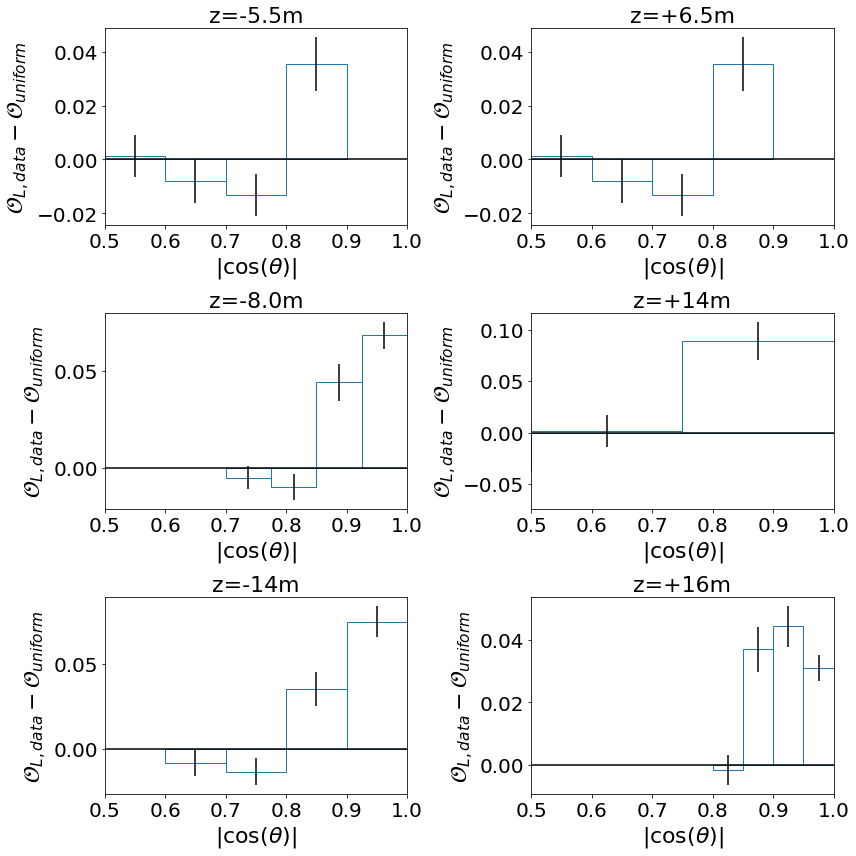

In [197]:
nbins = 5
tpcs = ['palila', 'iiwi', 'tako', 'nene', 'elepaio', 'humu']
pos = ['z=-5.5m', 'z=+6.5m', 'z=-8.0m', 'z=+14m', 'z=-14m', 'z=+16m']
cos_min = [0.5,0.5,0.7,0,0.6,0.8]
cos_max= [0.9,0.9,1.0,1.0,1.0,1.0]
plt.figure(figsize = (12,12))
i=1
for tpc in tpcs:
    width = (cos_max[i-1]-cos_min[i-1])/(nbins-1.)
    center = [cos_min[i-1]+(2.*k+1.)*(width/2.) for k in range (0,(nbins-1))]
    print(center)
    Lumi[tpc]['ones'] = 1
    Single_beam[tpc]['ones'] = 1
    Lumi_tmp2 = Lumi_tmp.loc[(np.abs(Lumi_tmp['phi_fold'])<100) 
                             & (np.abs(np.cos(Lumi_tmp['theta']*np.pi/180))>cos_min[i-1])
                            & (np.abs(np.cos(Lumi_tmp['theta']*np.pi/180))<cos_max[i-1])]
    MC_tmp2 = MC_tmp.loc[np.abs(MC_tmp['phi_fold'])<100]
    SB_tmp2 = SB_tmp.loc[(np.abs(SB_tmp['phi_fold'])<100)
                                  & (np.abs(np.cos(SB_tmp['theta']*np.pi/180))>cos_min[i-1])
                            & (np.abs(np.cos(SB_tmp['theta']*np.pi/180))<cos_max[i-1])]
    
    Lumi_tmp2 = Lumi_tmp2.loc[Lumi_tmp2['track_energy']>60]
    MC_tmp2 = MC_tmp2.loc[MC_tmp2['reco_energy']>60]
    SB_tmp2 = SB_tmp2.loc[SB_tmp2['track_energy']>60]
    
    #print(np.linspace(cos_min[i-1],cos_max[i-1],int(10*cos_max[i-1]-10*cos_min[i-1])))
    test2 = Lumi_tmp2.groupby(pd.cut(np.abs(np.cos(Lumi_tmp2['theta']*np.pi/180)), bins = np.linspace(cos_min[i-1],cos_max[i-1],nbins))).sum()
    #test_MC = MC_tmp.groupby(pd.cut(np.abs(np.cos(MC_tmp['fit_theta'])), bins = np.linspace(cos_min[i-1],cos_max[i-1],nbins))).sum()
    test_SB2 = SB_tmp2.groupby(pd.cut(np.abs(np.cos(SB_tmp2['theta']*np.pi/180)), bins = np.linspace(cos_min[i-1],cos_max[i-1],nbins))).sum()
    
    plt.subplot(3,2,i)
        
    plt.bar(center, (test2['track_energy']/test['track_energy'].sum())-(test_SB2['track_energy']/test_SB['track_energy'].sum()), yerr = 1.96*np.sqrt((np.sqrt(test2['ones'])*test2['track_energy']/test['track_energy'].sum()**2)+(np.sqrt(test_SB2['ones'])*test_SB2['track_energy']/test_SB['track_energy'].sum()**2)), width = width, label = '', fc = 'None', ec = 'tab:blue')
    #plt.bar(center,test2['track_energy']/test['track_energy'].sum(), width = width, fc = 'none', ec='tab:blue')
    #plt.bar(center,test_SB2['track_energy']/test_SB['track_energy'].sum(), width = width,fc = 'none', ec = 'tab:orange')
    
    plt.hlines(0,0,1,color = 'k')
    plt.ylabel(r'$\mathcal{O}_{L,data} - \mathcal{O}_{uniform}$')
    plt.xlabel(r'$|\cos(\theta)|$')
    plt.xlim(0.5,1)
    #plt.ylim(-0.1,0.1)
    plt.title(pos[i-1])
    
    #plt.subplot(6,2,i)
    #plt.bar(center, (test_SB['track_energy']/test_SB['track_energy'].sum())-(np.array([1 for i in range(0,len(test))])/len(test)), yerr = np.sqrt(test_SB['ones']*test_SB['track_energy']/test_SB['track_energy'].sum()**2 + (1/(10*len(test)))**2), width = width, label = '', fc = 'None', ec = 'tab:blue')
    #plt.bar(center, (test_MC['reco_energy']/test_MC['reco_energy'].sum())-(np.array([1 for i in range(0,len(test))])/len(test)), yerr = np.sqrt(test['ones']*test_MC['reco_energy']/test_MC['reco_energy'].sum()**2), width = width, label = '', fc = 'None', ec = 'tab:blue')
    #plt.hlines(0,0,1,color = 'k')
    #plt.xlim(0,1)
    #plt.ylim(-0.1,0.1)
    #plt.ylabel(r'$\mathcal{O}_{SB,data} - \mathcal{O}_{uniform}$')
    #plt.xlabel(r'$|\cos(\theta)|$')
    #plt.title(pos[j-1] + ' Single Beam Data')
    i+=1
plt.tight_layout()
plt.show()
#np.sqrt((test_err/test['track_energy'].sum())**2+(test_MC_err/test_MC['reco_energy'].sum())**2)

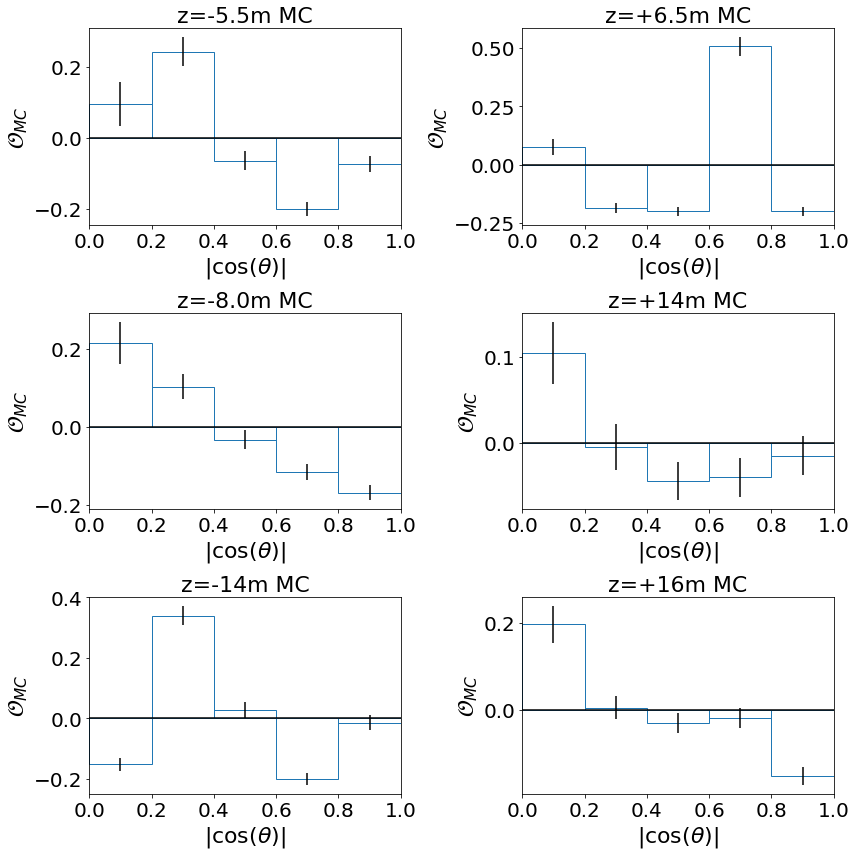

In [64]:
nbins = 6
width = 1/(nbins-1)
center = [(width*i)+width/2 for i in range(0,nbins-1)]
tpcs = ['palila', 'iiwi', 'tako', 'nene', 'elepaio', 'humu']
pos = ['z=-5.5m', 'z=+6.5m', 'z=-8.0m', 'z=+14m', 'z=-14m', 'z=+16m']
plt.figure(figsize = (12,12))
i=1
j=1
for tpc in tpcs:
    Lumi[tpc]['ones'] = 1
    Single_beam[tpc]['ones'] = 1
    Lumi_tmp = Lumi[tpc].loc[np.abs(Lumi[tpc]['phi_fold'])<100]
    MC_tmp = Scaled_MC[tpc].loc[np.abs(Scaled_MC[tpc]['phi_fold'])<100]
    SB_tmp = Single_beam[tpc].loc[np.abs(Single_beam[tpc]['phi_fold'])<100]
    
    ### Add MC lumi cuts ###
    
    MC_tmp = MC_tmp.loc[((MC_tmp['truth_mother_Z']>-870) & #Line is for RBB hotspot
               (MC_tmp['truth_mother_Z']<-750) & (MC_tmp['truth_mother_X']>20) &
                                       (MC_tmp['truth_mother_X']<60) &
                                       (np.abs(MC_tmp['truth_mother_Y'])<20))
                                      |                                
                                      (MC_tmp['truth_mother_Z']>1390) &
                                      (MC_tmp['truth_mother_Z']<1680) &
                                      (MC_tmp['truth_mother_X']<80) &
                                      (MC_tmp['truth_mother_X']>30) &
                                      (np.abs(MC_tmp['truth_mother_Y'])<20)] #FWD and BWD hotspots
    
    ###                  ###
    
    Lumi_tmp = Lumi_tmp.loc[Lumi_tmp['track_energy']>40]
    MC_tmp = MC_tmp.loc[MC_tmp['reco_energy']>40]
    SB_tmp = SB_tmp.loc[SB_tmp['track_energy']>40]
    
    test = Lumi_tmp.groupby(pd.cut(np.abs(np.cos(Lumi_tmp['theta']*np.pi/180)), bins = np.linspace(0,1,nbins))).sum()
    test_MC = MC_tmp.groupby(pd.cut(np.abs(np.cos(MC_tmp['fit_theta'])), bins = np.linspace(0,1,nbins))).sum()
    test_SB = SB_tmp.groupby(pd.cut(np.abs(np.cos(SB_tmp['theta']*np.pi/180)), bins = np.linspace(0,1,nbins))).sum()
    
    plt.subplot(3,2,i)
        
    plt.bar(center, (test_MC['reco_energy']/test_MC['reco_energy'].sum()) - (np.array([1 for i in range(0,len(test))])/len(test)), yerr = np.sqrt(test_MC['ones']*test_MC['reco_energy']/test_MC['reco_energy'].sum()**2 + (1/(10*len(test)))**2), width = width, label = '', fc = 'None', ec = 'tab:blue')
    plt.hlines(0,0,1,color = 'k')
    plt.ylabel(r'$\mathcal{O}_{MC}$')
    plt.xlabel(r'$|\cos(\theta)|$')
    plt.xlim(0,1)
    #plt.ylim(-0.1,0.1)
    plt.title(pos[j-1] + ' MC')
    
    #plt.subplot(6,2,i)
    #plt.bar(center, (test_SB['track_energy']/test_SB['track_energy'].sum())-(np.array([1 for i in range(0,len(test))])/len(test)), yerr = np.sqrt(test_SB['ones']*test_SB['track_energy']/test_SB['track_energy'].sum()**2 + (1/(10*len(test)))**2), width = width, label = '', fc = 'None', ec = 'tab:blue')
    #plt.bar(center, (test_MC['reco_energy']/test_MC['reco_energy'].sum())-(np.array([1 for i in range(0,len(test))])/len(test)), yerr = np.sqrt(test['ones']*test_MC['reco_energy']/test_MC['reco_energy'].sum()**2), width = width, label = '', fc = 'None', ec = 'tab:blue')
    #plt.hlines(0,0,1,color = 'k')
    #plt.xlim(0,1)
    #plt.ylim(-0.1,0.1)
    #plt.ylabel(r'$\mathcal{O}_{SB,data} - \mathcal{O}_{uniform}$')
    #plt.xlabel(r'$|\cos(\theta)|$')
    #plt.title(pos[j-1] + ' Single Beam Data')
    j+=1
    i+=1
plt.tight_layout()
plt.show()
#np.sqrt((test_err/test['track_energy'].sum())**2+(test_MC_err/test_MC['reco_energy'].sum())**2)

### Compare Distributions with eachother

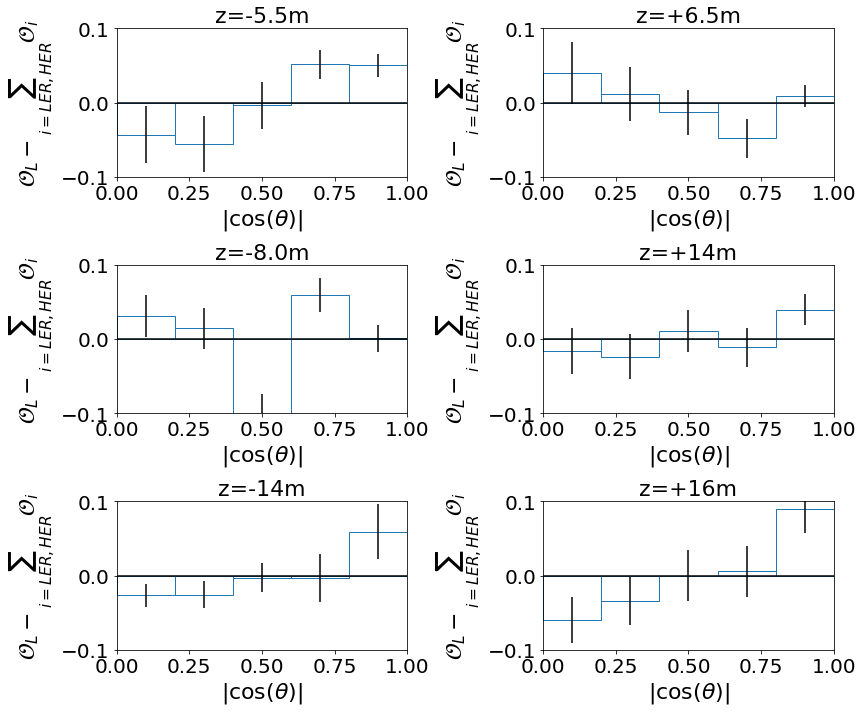

In [63]:
nbins = 6
width = 1/(nbins-1)
center = [(width*i)+width/2 for i in range(0,nbins-1)]
tpcs = ['palila', 'iiwi', 'tako', 'nene', 'elepaio', 'humu']
pos = ['z=-5.5m', 'z=+6.5m', 'z=-8.0m', 'z=+14m', 'z=-14m', 'z=+16m']
plt.figure(figsize = (12,10))
i=1
for tpc in tpcs:
    plt.subplot(3,2,i)
    Lumi[tpc]['ones'] = 1
    MC[tpc]['ones'] = 1
    MC_Lumi[tpc]['ones'] = 1
    Single_beam[tpc]['ones'] = 1
    Lumi_tmp = Lumi[tpc].loc[np.abs(Lumi[tpc]['phi_fold'])<100]
    MC_tmp = MC[tpc].loc[np.abs(MC[tpc]['phi_fold'])<100]
    SB_tmp = Single_beam[tpc].loc[np.abs(Single_beam[tpc]['phi_fold'])<100]
    
    Lumi_tmp = Lumi_tmp.loc[Lumi_tmp['track_energy']>0]
    MC_tmp = MC_tmp.loc[MC_tmp['reco_energy']>0]
    SB_tmp = SB_tmp.loc[SB_tmp['track_energy']>0]
    
    test = Lumi_tmp.groupby(pd.cut(np.abs(np.cos(Lumi_tmp['theta']*np.pi/180)), bins = np.linspace(0,1,nbins))).sum()
    test_MC = MC_tmp.groupby(pd.cut(np.abs(np.cos(MC_tmp['fit_theta'])), bins = np.linspace(0,1,nbins))).sum()
    test_SB = SB_tmp.groupby(pd.cut(np.abs(np.cos(SB_tmp['theta']*np.pi/180)), bins = np.linspace(0,1,nbins))).sum()
    
    #test_err = Lumi_tmp.groupby(pd.cut(np.abs(np.cos(Lumi_tmp['theta']*np.pi/180)), bins = np.linspace(0,1,nbins))).std()
    #test_MC_err = MC_tmp.groupby(pd.cut(np.abs(np.cos(MC_tmp['fit_theta'])), bins = np.linspace(0,1,nbins))).std()
    #test_SB_err = SB_tmp.groupby(pd.cut(np.abs(np.cos(SB_tmp['theta']*np.pi/180)), bins = np.linspace(0,1,nbins))).std()
    
    #test_err = np.sqrt(test['track_energy']/test['ones'])
    #test_MC_err = np.sqrt(test_MC['reco_energy']/test_MC['ones'])
    #test_SB_err = np.sqrt(test_SB['track_energy']/test_SB['ones'])
    
    #plt.errorbar(center, (test['track_energy']/test['track_energy'].sum())-(test_MC['reco_energy']/test_MC['reco_energy'].sum()), np.sqrt((test_err/test['track_energy'].sum())**2+(test_MC_err/test_MC['reco_energy'].sum())**2), [0 for i in range(0,len(test))], 'o', markersize = 3)#width = width, label = '', fc = 'None', ec = 'tab:blue')
    #plt.bar(center, (test['track_energy']/test['track_energy'].sum())-(test_MC['reco_energy']/test_MC['reco_energy'].sum()), yerr = np.sqrt((test_err/test['track_energy'].sum())**2+(test_MC_err/test_MC['reco_energy'].sum())**2), width = width, label = '', fc = 'None', ec = 'tab:blue')
    #plt.bar(center, (test['track_energy']/test['track_energy'].sum())-(test_SB['track_energy']/test_SB['track_energy'].sum()), yerr = np.sqrt((test_err['track_energy']/test['track_energy'].sum())**2+(test_SB_err['track_energy']/test_SB['track_energy'].sum())**2), width = width, label = '', fc = 'None', ec = 'tab:blue')
    plt.bar(center, (test['track_energy']/test['track_energy'].sum())-(test_SB['track_energy']/test_SB['track_energy'].sum()), yerr = np.sqrt(test['ones']*test['track_energy']/test['track_energy'].sum()**2+test_SB['ones']*test_SB['track_energy']/test_SB['track_energy'].sum()**2), width = width, label = '', fc = 'None', ec = 'tab:blue')
    plt.hlines(0,0,1,color = 'k')
    plt.xlim(0,1)
    plt.ylim(-0.1,0.1)
    plt.ylabel(r'$\mathcal{O}_L - \sum_{i=LER,HER}\mathcal{O}_i$')
    plt.xlabel(r'$|\cos(\theta)|$')
    plt.title(pos[i-1])
    i+=1
plt.tight_layout()
plt.show()
#np.sqrt((test_err/test['track_energy'].sum())**2+(test_MC_err/test_MC['reco_energy'].sum())**2)

In [ ]:
nbins = 11
width = 1/(nbins-1)
center = [(width*i)+width/2 for i in range(0,nbins-1)]
tpcs = ['palila', 'iiwi', 'tako', 'nene', 'elepaio', 'humu']
plt.figure(figsize = (12,10))
i=1
for tpc in tpcs:
    plt.subplot(3,2,i)
    Lumi[tpc]['ones'] = 1
    MC[tpc]['ones'] = 1
    MC_Lumi[tpc]['ones'] = 1
    Single_beam[tpc]['ones'] = 1
    #Scaled_MC[tpc]['ones'] = 1
    Lumi_tmp = Lumi[tpc].loc[np.abs(Lumi[tpc]['phi_fold'])<100]
    MC_tmp = Scaled_MC[tpc].loc[np.abs(Scaled_MC[tpc]['phi_fold'])<100]
    SB_tmp = Single_beam[tpc].loc[np.abs(Single_beam[tpc]['phi_fold'])<100]
    test = Lumi_tmp.groupby(pd.cut(np.abs(np.cos(Lumi_tmp['theta']*np.pi/180)), bins = np.linspace(0,1,nbins))).sum()
    test_MC = MC_tmp.groupby(pd.cut(np.abs(np.cos(MC_tmp['fit_theta'])), bins = np.linspace(0,1,nbins))).sum()
    test_SB = SB_tmp.groupby(pd.cut(np.abs(np.cos(SB_tmp['theta']*np.pi/180)), bins = np.linspace(0,1,nbins))).sum()
    
    
    #test_err = Lumi_tmp.groupby(pd.cut(np.abs(np.cos(Lumi_tmp['theta']*np.pi/180)), bins = np.linspace(0,1,nbins))).sem()
    #test_MC_err = MC_tmp.groupby(pd.cut(np.abs(np.cos(MC_tmp['fit_theta'])), bins = np.linspace(0,1,nbins))).sem()
    #test_SB_err = SB_tmp.groupby(pd.cut(np.abs(np.cos(SB_tmp['theta']*np.pi/180)), bins = np.linspace(0,1,nbins))).sem()
    #plt.errorbar(center, (test['track_energy']/test['track_energy'].sum())-(test_MC['reco_energy']/test_MC['reco_energy'].sum()), np.sqrt((test_err/test['track_energy'].sum())**2+(test_MC_err/test_MC['reco_energy'].sum())**2), [0 for i in range(0,len(test))], 'o', markersize = 3)#width = width, label = '', fc = 'None', ec = 'tab:blue')
    #plt.bar(center, (test['track_energy']/test['track_energy'].sum())-(test_MC['reco_energy']/test_MC['reco_energy'].sum()), yerr = np.sqrt((test_err/test['track_energy'].sum())**2+(test_MC_err/test_MC['reco_energy'].sum())**2), width = width, label = '', fc = 'None', ec = 'tab:blue')
    #plt.bar(center, (test['track_energy']/test['track_energy'].sum())-(test_SB['track_energy']/test_SB['track_energy'].sum()), yerr = np.sqrt(((test_err['track_energy']/test['track_energy'].sum())**2)+((test_SB_err['track_energy']/test_SB['track_energy'].sum())**2)), width = width, label = '', fc = 'None', ec = 'tab:blue')
    
    plt.bar(center, (test['track_energy']/test['track_energy'].sum())-(test_MC['reco_energy']/test_MC['reco_energy'].sum()), yerr = np.sqrt(test['ones']*test['track_energy']/test['track_energy'].sum()**2+test_MC['ones']*test_MC['reco_energy']/test_MC['reco_energy'].sum()**2), width = width, label = '', fc = 'None', ec = 'tab:blue')
    plt.hlines(0,0,1,color = 'k')
    plt.xlim(0,1)
    #plt.ylim(-0.1,0.1)
    plt.ylabel(r'$\mathcal{O}_{L,data} - \mathcal{O}_{MC}$')
    plt.xlabel(r'$|\cos(\theta)|$')
    plt.title(pos[i-1])
    i+=1
plt.tight_layout()
plt.show()
#np.sqrt((test_err/test['track_energy'].sum())**2+(test_MC_err/test_MC['reco_energy'].sum())**2)

In [ ]:
from scipy.stats import ks_2samp
from scipy.stats import epps_singleton_2samp
from scipy.stats import mannwhitneyu
plt.figure(figsize = (14,12))
i = 1
for tpc in ['palila', 'iiwi', 'tako', 'nene', 'elepaio', 'humu']:
    tmp_lumi = Lumi[tpc].loc[(Lumi[tpc]['track_energy']>150) & (np.abs(Lumi[tpc]['phi_fold'])<27)]
    tmp_single = Single_beam[tpc].loc[(Single_beam[tpc]['track_energy']>150) & (np.abs(Lumi[tpc]['phi_fold'])<27)]
    plt.subplot(3,2,i)
    
    (counts_lumi, bins_lumi) = np.histogram(np.abs(np.cos(tmp_lumi['theta']*np.pi/180)), bins=11, range = (0,1))
    factor_lumi = 1/len(tmp_lumi)
    plt.hist(bins_lumi[:-1], bins_lumi, weights=factor_lumi*counts_lumi, label = 'Lumi Exp.', histtype = 'step')
    
    (counts, bins) = np.histogram(np.abs(np.cos(tmp_single['theta']*np.pi/180)), bins=11, range = (0,1))
    factor = 1/len(tmp_single)
    plt.hist(bins[:-1], bins, weights=factor*counts, label = 'Single Beam Exp.', histtype = 'step')
    
    #plt.hist(np.abs(np.cos(tmp_lumi['theta']*np.pi/180)), bins = 11, range = (0,1), histtype = 'step', label = 'lumi')#, norm = matplotlib.colors.LogNorm(vmin=0.9, vmax=100))
    #plt.hist(np.abs(np.cos(tmp_single['theta']*np.pi/180)), bins = 11, range = (0,1), histtype = 'step', label = 'single')
    #plt.hist(tmp['phi_fold'], bins = 21, range = (-90,90))
    
    plt.legend(loc = 'lower center')
    plt.xlabel(r'|cos($\theta$)|')
    plt.title(tpc)
    #plt.ylim(0,1.25)
    plt.ylabel('Counts [a.u.]')
    i+=1
    
    result = ks_2samp(np.abs(np.cos(tmp_lumi['theta']*np.pi/180)), np.abs(np.cos(tmp_single['theta']*np.pi/180)))
    print(result)
    
plt.tight_layout()
plt.show()

In [ ]:
MC_Lumi = {}
#for tpc in ['palila', 'tako', 'elepaio']:
for tpc in ['palila', 'tako', 'elepaio', 'nene', 'iiwi', 'humu']:
    MC_Lumi[tpc] = MC[tpc].loc[(MC[tpc]['bgType'] == 'RBB_Lumi') | (MC[tpc]['bgType'] == 'twoPhoton_Lumi')]
    #MC_Lumi[tpc] = MC_Lumi[tpc].loc[((MC_Lumi[tpc]['truth_mother_Z']>-870) & #Line is for RBB hotspot
    #           (MC_Lumi[tpc]['truth_mother_Z']<-750) & (MC_Lumi[tpc]['truth_mother_X']>20) &
    #                                   (MC_Lumi[tpc]['truth_mother_X']<60) &
    #                                   (np.abs(MC_Lumi[tpc]['truth_mother_Y'])<20))
    #                                  |                                
    #                                  (MC_Lumi[tpc]['truth_mother_Z']>1390) &
    #                                  (MC_Lumi[tpc]['truth_mother_Z']<1680) &
    #                                  (MC_Lumi[tpc]['truth_mother_X']<80) &
    #                                  (MC_Lumi[tpc]['truth_mother_X']>30) &
    #                                  (np.abs(MC_Lumi[tpc]['truth_mother_Y'])<20)] #FWD and BWD hotspots

In [ ]:
i=1
plt.figure(figsize = (12,12))
for tpc in ['palila', 'iiwi', 'tako', 'nene', 'elepaio', 'humu']:
    
    tmp_lumi = Lumi[tpc].loc[(Lumi[tpc]['track_energy']>0)]
    tmp_MC = MC_Lumi[tpc].loc[MC_Lumi[tpc]['reco_energy']>0]#MC_Lumi[tpc].loc[MC_Lumi[tpc]['reco_energy']>20]
    
    plt.subplot(3,2,i)
    
    (counts_lumi, bins_lumi) = np.histogram(np.abs(np.cos(tmp_lumi['theta']*np.pi/180)), bins=21, range = (0,1))
    factor_lumi = 1/counts_lumi.max()
    plt.hist(bins_lumi[:-1], bins_lumi, weights=factor_lumi*counts_lumi, label = 'Lumi Data', histtype = 'step')
    
    (counts_MC, bins_MC) = np.histogram(np.abs(np.cos(tmp_MC['fit_theta'])), bins=21, range = (0,1))
    factor_MC = 1/counts_MC.max()
    plt.hist(bins_MC[:-1], bins_MC, weights=factor_MC*counts_MC, label = 'Lumi MC', histtype = 'step')
    
    plt.title(tpc)
    plt.legend()
    i+=1
    
    result = ks_2samp(np.abs(np.cos(tmp_lumi['theta']*np.pi/180)), np.abs(np.cos(tmp_MC['fit_theta'])))
    print(result)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import ks_2samp
from scipy.stats import epps_singleton_2samp
MC_single = {}
i = 1
plt.figure(figsize = (14,12))
labels = ['z=-5.5m', 'z=+6.5m', 'z=-8.0m', 'z=14m', 'z=-14m', 'z=+16m']
#for tpc in ['palila', 'tako', 'elepaio']:
for tpc in ['palila', 'iiwi', 'tako', 'nene', 'elepaio', 'humu']:
    lumi_data = Lumi_cont_inj[tpc].loc[Lumi_cont_inj[tpc]['track_energy']>100]# & (Lumi_cont_inj[tpc]['phi_fold']>-3)]
    #lumi_data = lumi_data.loc[(lumi_data['phi_fold']<20) & (lumi_data['phi_fold']>-20)]
    single_beam_data = Single_beam_combined[tpc].loc[(Single_beam_combined[tpc]['track_energy']>100)]# & (Lumi_cont_inj[tpc]['phi_fold']>-3)]
    #single_beam_data = single_beam_data.loc[(single_beam_data['phi_fold']<20) & (single_beam_data['phi_fold']>-20)]
    plt.subplot(3,2,i)
    
    (counts_lumi, bins_lumi) = np.histogram(np.abs(np.cos(lumi_data['theta']*np.pi/180)), bins=51, range = (0,1))
    factor_lumi = 1/counts_lumi.max()
    plt.hist(bins_lumi[:-1], bins_lumi, weights=factor_lumi*counts_lumi, label = 'Lumi Data', histtype = 'step')
    
    (counts_sb, bins_sb) = np.histogram(np.abs(np.cos(single_beam_data['theta']*np.pi/180)), bins=51, range = (0,1))
    factor_sb = 1/counts_sb.max()
    plt.hist(bins_sb[:-1], bins_sb, weights=factor_sb*counts_sb, label = 'Single Beam Data', histtype = 'step')
                                                      
    #result = epps_singleton_2samp(np.cos(lumi_data['theta']*np.pi/180), np.cos(single_beam_data['theta']*np.pi/180))
    #print(result)
    
    plt.legend()
    plt.title(labels[i-1])
    plt.ylim(0,1.5)
    i+=1
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import ks_2samp
from scipy.stats import epps_singleton_2samp
from scipy.stats import anderson_ksamp
MC_single = {}
i = 1
plt.figure(figsize = (7,12))
for tpc in ['palila', 'tako', 'elepaio']:
#for tpc in ['iiwi', 'nene', 'humu']:
    tmp = MC_Lumi[tpc].loc[MC_Lumi[tpc]['reco_energy']>50]
    MC_single[tpc] = MC[tpc].loc[(MC[tpc]['bgType'] != 'RBB_Lumi') & (MC[tpc]['bgType'] != 'twoPhoton_Lumi')]
    tmp2 = MC_single[tpc].loc[MC_single[tpc]['reco_energy']>50]
    #tmp_data = Single_beam_combined[tpc].loc[(Single_beam_combined[tpc]['phi_fold']<100)]# & (Single_beam_combined[tpc]['phi_fold']>-10)]# & (Lumi_cont_inj[tpc]['phi_fold']>-3)]
    tmp_data = Lumi_cont_inj[tpc].loc[(Lumi_cont_inj[tpc]['phi_fold']<50)]# & (Lumi_cont_inj[tpc]['phi_fold']>-10)]
    tmp_data = tmp_data.loc[tmp_data['track_energy']>50]
    #tmp = tmp.loc[tmp['phi_fold']<-50]
    plt.subplot(3,1,i)
    #plt.hist(np.abs(np.cos(tmp['fit_theta'])), bins = 21, range = (0,1), histtype='step', label = 'Lumi_MC')
    (counts, bins) = np.histogram(np.abs(np.cos(tmp_data['theta']*np.pi/180)), bins=41, range = (0,1))
    factor = 1/counts.max()
    plt.hist(bins[:-1], bins, weights=factor*counts, label = 'Data Lumi', histtype = 'step')
    #plt.hist(np.abs(np.cos(tmp_data['theta']*np.pi/180)), bins = 21, range = (0,1), label = 'data', histtype = 'step')
    (counts_MC, bins_MC) = np.histogram(np.abs(np.cos(tmp2['fit_theta'])), bins=41, range = (0,1))
    factor_MC = 1/counts_MC.max()
    plt.hist(bins_MC[:-1], bins_MC, weights=factor_MC*counts_MC, label = 'MC Lumi', histtype = 'step')
    #plt.hist(np.abs(np.cos(tmp2['fit_theta'])), bins = 21, range = (0,1), histtype = 'step', label = 'Single beam MC')
    #plt.hist(tmp['phi_fold'], bins = 21, range = (-180,180))
    #print(len(tmp))
    #result = ks_2samp(np.abs(np.cos(tmp['fit_theta'])), np.abs(np.cos(tmp2['fit_theta'])))
    #print(result)
    result2 = ks_2samp(np.abs(np.cos(tmp2['fit_theta'])), np.abs(np.cos(tmp_data['theta']*np.pi/180)))
    #result = anderson_ksamp([np.cos(tmp['fit_theta']).to_numpy(), np.cos(tmp_data['theta']*np.pi/180).to_numpy()])
    print(result2)
    plt.legend()
    plt.title(tpc)
    plt.ylim(0,1.5)
    i+=1

In [ ]:
from scipy.stats import ks_2samp
from scipy.stats import epps_singleton_2samp

MC_single = {}
plt.figure(figsize = (7,12))
i = 1
for tpc in ['palila', 'tako', 'elepaio']:
    MC_single[tpc] = MC[tpc].loc[(MC[tpc]['bgType'] != 'RBB_Lumi') & (MC[tpc]['bgType'] != 'twoPhoton_Lumi')]
    tmp2 = MC_single[tpc].loc[MC_single[tpc]['reco_energy']>100]
    plt.subplot(3,1,i)
    plt.hist(np.abs(np.cos(tmp2['fit_theta'])), bins = 21, range = (0,1))
    result = ks_2samp(np.abs(np.cos(tmp['fit_theta'])), np.abs(np.cos(tmp2['fit_theta'])))
    #result = epps_singleton_2samp(np.abs(np.cos(tmp['fit_theta'])), np.abs(np.cos(tmp2['fit_theta'])))
    print(len(tmp2))
    print(result)
    #plt.hist(tmp2['phi_fold'], bins = 21)
    plt.title(tpc)
    i+=1

In [ ]:
MC_Lumi['palila'].columns

In [ ]:
import matplotlib
def plot_theta_phi(side = 'BWD'):
    #tpcs = ['palila', 'iiwi', 'tako', 'nene', 'elepaio', 'humu']
    if side == 'BWD':
        tpcs = ['palila', 'tako', 'elepaio']
    else:
        tpcs = ['humu', 'nene', 'iiwi']
    i = 1
    fig = plt.figure(figsize=(14,12))
    plt.rc('legend', fontsize=12)
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.rc('axes', labelsize=18)
    plt.rc('axes', titlesize=18)
    for tpc in tpcs:
        #plt.subplot(6,3,i)
        #plt.hist2d(np.cos(LER_cont_inj[tpc]['theta']*np.pi/180), LER_cont_inj[tpc]['phi'], bins = (20,15), range = ((-1.2,1.2), (-185,185)), label = 'LER_cont_inj', norm = matplotlib.colors.LogNorm(vmin=0.9, vmax=100))
        #plt.title(tpc+' LER_cont_inj')
        #plt.xlabel(r'cos($\theta$)')
        #plt.ylabel(r'$\phi$ [$^\circ$]')
        #plt.ylim(-200,200)
        plt.subplot(3,2,i+1)
        plt.hist2d(np.abs(np.cos(Lumi_cont_inj[tpc]['theta']*np.pi/180)), Lumi_cont_inj[tpc]['phi_fold'], bins = (11,9), range = ((0,1), (-90,90)), label = 'Data', vmin = 0)#, norm = matplotlib.colors.LogNorm(vmin=0.9, vmax=100))
        #plt.hist2d(np.cos(Single_beam_combined[tpc]['theta']*np.pi/180), Single_beam_combined[tpc]['phi_fold'], bins = (20,10), range = ((-1.1,1.1), (-95,95)), label = 'Data')#, norm = matplotlib.colors.LogNorm(vmin=0.9, vmax=100))
        plt.title('Luminosity Study')
        plt.xlabel(r'|cos($\theta$)|')
        plt.ylabel(r'$\phi$ [$^\circ$]')
        plt.ylim(-90,90)
        plt.colorbar().set_label('Recoils/bin', rotation = 270, labelpad = 20)
        plt.subplot(3,2,i)
        plt.hist2d(np.abs(np.cos(Single_beam_combined[tpc]['theta']*np.pi/180)), Single_beam_combined[tpc]['phi_fold'], bins = (11,9), range = ((0,1), (-90,90)), label = 'Data', vmin = 0 )#, norm = matplotlib.colors.LogNorm(vmin=0.9, vmax=100))
        plt.title('Single Beam Combined')
        plt.xlabel(r'|cos($\theta$)|')
        plt.ylabel(r'$\phi$ [$^\circ$]')
        plt.ylim(-90,90)
        plt.colorbar().set_label('Recoils/bin', rotation = 270, labelpad = 20)
        #plt.hist2d(MC[tpc]['fit_theta']*180/np.pi, MC[tpc]['fit_phi']*180/np.pi, bins = (10,10), range = ((-180,180), (-185,185)), label = 'MC')#, norm = matplotlib.colors.LogNorm(vmin=0.9, vmax=100))
        #plt.title(tpc+' MC')
        #plt.colorbar()
        #plt.yscale("Log")
        #plt.xlabel(r'cos($\theta$)')
        #plt.ylabel(r'$\phi$ [$^\circ$]')
        #plt.ylim(-200,200)
        #plt.ylim(0.9,3000)
        #plt.legend()
        
        #plt.hist(LER_decay[tpc]['theta'], bins = 90, histtype = 'step', range = (-5,185), label = 'LER_decay', linewidth = 2)
        #plt.hist(HER_decay[tpc]['theta'], bins = 90, histtype = 'step', range = (-5,185), label = 'HER_decay', linewidth = 2)
        #plt.hist(Lumi_decay[tpc]['theta'], bins = 90, histtype = 'step', range = (-5,185), label = 'Lumi_decay', linewidth = 2)
        #plt.title(tpc)
        #plt.yscale("Log")
        #plt.xlabel('Track theta [degrees]')
        #plt.ylim(0.9,3000)
        #plt.legend()
        i+=2
    plt.tight_layout()
    plt.show()
plot_theta_phi('BWD')

In [ ]:
import matplotlib
def plot_theta_phi_MC(side = 'BWD'):
    #tpcs = ['palila', 'iiwi', 'tako', 'nene', 'elepaio', 'humu']
    if side == 'BWD':
        tpcs = ['palila', 'tako', 'elepaio']
    else:
        tpcs = ['humu', 'nene', 'iiwi']
    i = 1
    fig = plt.figure(figsize=(14,12))
    plt.rc('legend', fontsize=12)
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.rc('axes', labelsize=18)
    plt.rc('axes', titlesize=18)
    for tpc in tpcs:

        plt.subplot(3,2,i+1)
        plt.hist2d(np.abs(np.cos(MC[tpc].loc[(MC[tpc]['bgType'] == 'RBB_Lumi') | (MC[tpc]['bgType'] == 'twoPhoton_Lumi')]['fit_theta'])), MC[tpc].loc[(MC[tpc]['bgType'] == 'RBB_Lumi') | (MC[tpc]['bgType'] == 'twoPhoton_Lumi')]['phi_fold'], bins = (11,9), range = ((0,1), (-90,90)), label = 'Data')#, norm = matplotlib.colors.LogNorm(vmin=0.9, vmax=100))
        #plt.hist2d(np.cos(Single_beam_combined[tpc]['theta']*np.pi/180), Single_beam_combined[tpc]['phi_fold'], bins = (20,10), range = ((-1.1,1.1), (-95,95)), label = 'Data')#, norm = matplotlib.colors.LogNorm(vmin=0.9, vmax=100))
        plt.title('Lumi MC')
        plt.xlabel(r'|cos($\theta$)|')
        plt.ylabel(r'$\phi$ [$^\circ$]')
        plt.ylim(-90,90)
        plt.colorbar().set_label('Recoils/bin', rotation = 270, labelpad = 20)
        plt.subplot(3,2,i)
        plt.hist2d(np.abs(np.cos(MC[tpc].loc[(MC[tpc]['bgType'] != 'RBB_Lumi') & (MC[tpc]['bgType'] != 'twoPhoton_Lumi')]['fit_theta'])), MC[tpc].loc[(MC[tpc]['bgType'] != 'RBB_Lumi') & (MC[tpc]['bgType'] != 'twoPhoton_Lumi')]['phi_fold'], bins = (11,9), range = ((0,1), (-90,90)), label = 'Data')#, norm = matplotlib.colors.LogNorm(vmin=0.9, vmax=100))
        plt.title('Single Beam MC')
        plt.xlabel(r'|cos($\theta$)|')
        plt.ylabel(r'$\phi$ [$^\circ$]')
        plt.ylim(-90,90)
        plt.colorbar().set_label('Recoils/bin', rotation = 270, labelpad = 20)
        i+=2
    plt.tight_layout()
    plt.show()
plot_theta_phi_MC('BWD')

In [ ]:
import matplotlib
def plot_theta_phi_MC(side = 'BWD'):
    #tpcs = ['palila', 'iiwi', 'tako', 'nene', 'elepaio', 'humu']
    if side == 'BWD':
        tpcs = ['palila', 'tako', 'elepaio']
    else:
        tpcs = ['humu', 'nene', 'iiwi']
    i = 1
    fig = plt.figure(figsize=(7,12))
    plt.rc('legend', fontsize=12)
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.rc('axes', labelsize=18)
    plt.rc('axes', titlesize=18)
    for tpc in tpcs:

        plt.subplot(3,1,i)
        plt.hist2d(np.abs(np.cos(MC[tpc]['fit_theta'])), MC[tpc]['phi_fold'], bins = (11,6), range = ((0,1), (-90,90)), label = 'Data')#, norm = matplotlib.colors.LogNorm(vmin=0.9, vmax=100))
        #plt.hist2d(np.cos(Single_beam_combined[tpc]['theta']*np.pi/180), Single_beam_combined[tpc]['phi_fold'], bins = (20,10), range = ((-1.1,1.1), (-95,95)), label = 'Data')#, norm = matplotlib.colors.LogNorm(vmin=0.9, vmax=100))
        plt.title(tpc)
        plt.xlabel(r'|cos($\theta$)|')
        plt.ylabel(r'$\phi$ [$^\circ$]')
        plt.ylim(-90,90)
        plt.colorbar().set_label('Recoils/bin', rotation = 270, labelpad = 20)
        #plt.subplot(3,2,i)
        #plt.hist2d(np.abs(np.cos(MC[tpc].loc[(MC[tpc]['bgType'] != 'RBB_Lumi') & (MC[tpc]['bgType'] != 'twoPhoton_Lumi')]['fit_theta'])), MC[tpc].loc[(MC[tpc]['bgType'] != 'RBB_Lumi') & (MC[tpc]['bgType'] != 'twoPhoton_Lumi')]['phi_fold'], bins = (11,9), range = ((0,1), (-90,90)), label = 'Data')#, norm = matplotlib.colors.LogNorm(vmin=0.9, vmax=100))
        #plt.title('Single Beam MC')
        #plt.xlabel(r'|cos($\theta$)|')
        #plt.ylabel(r'$\phi$ [$^\circ$]')
        #plt.ylim(-90,90)
        #plt.colorbar().set_label('Recoils/bin', rotation = 270, labelpad = 20)
        i+=1
    plt.tight_layout()
    plt.show()
plot_theta_phi_MC('BWD')

In [ ]:
MC['iiwi'].columns

In [ ]:
def plot_E_v_Theta(side = "BWD"):
    if side == "BWD":
        tpcs = ['tako', 'palila', 'elepaio']
    else:
        tpcs = ['iiwi', 'nene', 'humu']
    i = 1
    fig = plt.figure(figsize=(20,10))
    for tpc in tpcs:
        plt.subplot(3,2,i)
        plt.plot(Lumi_cont_inj[tpc]['theta'], Lumi_cont_inj[tpc]['full_corrected_energy'], 'o', markersize = 1, alpha = 0.5, label = 'Lumi_cont_inj')
        plt.plot(LER_cont_inj[tpc]['theta'], LER_cont_inj[tpc]['full_corrected_energy'], 'o', markersize = 1, alpha = 0.5, label = 'LER_cont_inj')
        plt.plot(HER_cont_inj[tpc]['theta'], HER_cont_inj[tpc]['full_corrected_energy'], 'o', markersize = 1, alpha = 0.5, label = 'HER_cont_inj')
        plt.title(tpc)
        #plt.yscale("Log")
        plt.xlabel('Track theta [degrees]')
        plt.ylabel('Energy [keV]')
        plt.ylim(0,1000)
        plt.legend()
        plt.subplot(3,2,i+1)
        plt.plot(Lumi_decay[tpc]['theta'], Lumi_decay[tpc]['full_corrected_energy'], 'o', markersize = 1, alpha = 0.5, label = 'Lumi_decay')
        plt.plot(LER_decay[tpc]['theta'], LER_decay[tpc]['full_corrected_energy'], 'o', markersize = 1, alpha = 0.5, label = 'LER_decay')
        plt.plot(HER_decay[tpc]['theta'], HER_decay[tpc]['full_corrected_energy'], 'o', markersize = 1, alpha = 0.5, label = 'HER_decay')
        plt.title(tpc)
        #plt.yscale("Log")
        plt.xlabel('Track theta [degrees]')
        plt.ylabel('Energy [keV]')
        plt.ylim(0,1000)
        plt.legend()
        i+=2
    plt.tight_layout()
    plt.show()
plot_E_v_Theta("BWD")

In [ ]:
import matplotlib
def plot_theta_phi_paper():
    tpcs = ['palila', 'iiwi', 'tako', 'nene', 'elepaio', 'humu']
    i = 1
    fig = plt.figure(figsize=(12,10))
    plt.rc('legend', fontsize=12)
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.rc('axes', labelsize=18)
    plt.rc('axes', titlesize=18)
    for tpc in tpcs:
        #plt.subplot(6,3,i)
        #plt.hist2d(np.cos(LER_cont_inj[tpc]['theta']*np.pi/180), LER_cont_inj[tpc]['phi'], bins = (20,15), range = ((-1.2,1.2), (-185,185)), label = 'LER_cont_inj', norm = matplotlib.colors.LogNorm(vmin=0.9, vmax=100))
        #plt.title(tpc+' LER_cont_inj')
        #plt.xlabel(r'cos($\theta$)')
        #plt.ylabel(r'$\phi$ [$^\circ$]')
        #plt.ylim(-200,200)
        plt.subplot(3,2,i)
        plt.hist2d(np.cos(Lumi_cont_inj[tpc]['theta']*np.pi/180), Lumi_cont_inj[tpc]['phi'], bins = (20,15), range = ((-1.2,1.2), (-185,185)), label = 'Lumi_cont_inj')#, norm = matplotlib.colors.LogNorm(vmin=0.9, vmax=100))
        plt.title(tpc)
        plt.xlabel(r'cos($\theta$)')
        plt.ylabel(r'$\phi$ [$^\circ$]')
        plt.ylim(-200,200)
        plt.colorbar()
        i+=1
    plt.tight_layout()
    plt.savefig("ang_dist.png")
    plt.show()
plot_theta_phi_paper()

In [ ]:
#nbins = 21
#width = 1/(nbins-1)
#center = [(width*i)+width/2 for i in range(0,nbins-1)]
plt.figure(figsize = (12,12))
MC_Lumi_cut = {}
MC_SB_cut = {}
i=1
for tpc in ['palila', 'iiwi', 'tako', 'nene', 'elepaio', 'humu']:
    plt.subplot(3,2,i)
    MC_Lumi_cut[tpc] = MC_Lumi[tpc].loc[np.abs(MC_Lumi[tpc]['phi_fold'])<1000]
    MC_SB_cut[tpc] = MC_SB[tpc].loc[np.abs(MC_SB[tpc]['phi_fold'])<1000]
    plt.hist(np.abs(np.cos(MC_Lumi_cut[tpc]['fit_theta'])), bins=21, range=(0,1), weights=MC_Lumi_cut[tpc]['reco_energy']/MC_Lumi_cut[tpc]['reco_energy'].sum(), histtype = 'step', label = 'lumi')
    plt.hist(np.abs(np.cos(MC_SB_cut[tpc]['fit_theta'])), bins=21, range=(0,1), weights=MC_SB_cut[tpc]['reco_energy']/MC_SB_cut[tpc]['reco_energy'].sum(), histtype = 'step', label = 'single beam')
    #test_MC_Lumi = MC_Lumi_cut[tpc].groupby(pd.cut(np.abs(np.cos(MC_Lumi_cut[tpc]['fit_theta'])), bins = np.linspace(0,1,nbins))).sum()
    #test_MC_SB = MC_SB_cut[tpc].groupby(pd.cut(np.abs(np.cos(MC_SB_cut[tpc]['fit_theta'])), bins = np.linspace(0,1,nbins))).sum()
    #plt.bar(center, test_MC_Lumi['reco_energy']/test_MC_Lumi['reco_energy'].sum(),width = width, label = 'luminosity_MC', fc = 'None', ec = 'tab:blue')
    #plt.bar(center, test_MC_SB['reco_energy']/test_MC_SB['reco_energy'].sum(),width = width, label = 'Single beam', fc = 'None', ec = 'tab:orange')
    #plt.bar(center, test_single['track_energy']/test_single['track_energy'].sum(), width = width, label = 'single beam', fc = 'None', ec = 'tab:orange')
    plt.title(tpc)
    plt.legend()
    i+=1
plt.tight_layout()
plt.show()

In [ ]:
#nbins = 21
#width = 1/(nbins-1)
#center = [(width*i)+width/2 for i in range(0,nbins-1)]
plt.figure(figsize = (12,12))
Lumi_cut = {}
Single_beam_cut = {}
i=1
for tpc in ['palila', 'iiwi', 'tako', 'nene', 'elepaio', 'humu']:
    plt.subplot(3,2,i)
    Lumi_cut[tpc] = Lumi[tpc].loc[np.abs(Lumi[tpc]['phi_fold'])<30]
    Single_beam_cut[tpc] = Single_beam[tpc].loc[np.abs(Single_beam[tpc]['phi_fold']<30)]
    plt.hist(np.abs(np.cos(Lumi_cut[tpc]['theta']*np.pi/180)), bins=21, range=(0,1), weights=Lumi_cut[tpc]['track_energy']/Lumi_cut[tpc]['track_energy'].sum(), histtype = 'step', label = 'lumi')
    plt.hist(np.abs(np.cos(Single_beam_cut[tpc]['theta']*np.pi/180)), bins=21, range=(0,1), weights=Single_beam_cut[tpc]['track_energy']/Single_beam_cut[tpc]['track_energy'].sum(), histtype = 'step', label = 'single beam')
    #test_lumi = Lumi_cut[tpc].groupby(pd.cut(np.abs(np.cos(Lumi_cut[tpc]['theta']*np.pi/180)), bins = np.linspace(0,1,nbins))).sum()
    #test_single = Single_beam_cut[tpc].groupby(pd.cut(np.abs(np.cos(Single_beam_cut[tpc]['theta']*np.pi/180)), bins = np.linspace(0,1,nbins))).sum()
    #plt.bar(center, test_lumi['track_energy']/test_lumi['track_energy'].sum(),width = width, label = 'luminosity', fc = 'None', ec = 'tab:blue')
    #plt.bar(center, test_single['track_energy']/test_single['track_energy'].sum(), width = width, label = 'single beam', fc = 'None', ec = 'tab:orange')
    plt.title(tpc)
    i+=1
plt.tight_layout()
plt.show()

In [ ]:
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=22)
plt.rc('axes', titlesize=22)
plt.figure(figsize = (20,25))
i = 1
j=1
pos = ['z=-14m', 'z=-8.0m', 'z=-5.5m', 'z=6.5m', 'z=14m', 'z=16m']
for tpc in ['elepaio', 'tako', 'palila', 'iiwi', 'nene', 'humu']:
    plt.subplot(6,2,i)
    a1,b1,c1,d1 = plt.hist2d(np.abs(np.cos(Lumi[tpc]['theta']*np.pi/180)), Lumi[tpc]['phi_fold'], bins=(10,2), range=((0,1),(-30,30)), weights=Lumi[tpc]['track_energy']/Lumi[tpc]['track_energy'].sum(), density=None, vmin = 0, vmax = 0.05)
    plt.colorbar(d1).set_label(r'$\Sigma E$ per bin [keV]', rotation = 270, labelpad = 20)
    plt.title('Lumi ' + pos[j-1])
    plt.yticks([-30,0,30])
    plt.ylabel(r'$\phi[^\circ]$')
    plt.xlabel(r'$|\cos(\theta)|$')
    plt.subplot(6,2,i+1)
    a2,b2,c2,d2 = plt.hist2d(np.abs(np.cos(Single_beam[tpc]['theta']*np.pi/180)), Single_beam[tpc]['phi_fold'], bins=(10,2), range=((0,1),(-30,30)), weights=Single_beam[tpc]['track_energy']/Single_beam[tpc]['track_energy'].sum(), density=None, vmin = 0, vmax = 0.05)
    plt.colorbar(d2).set_label(r'$\Sigma E$ per bin [keV]', rotation = 270, labelpad = 20)
    plt.title('Single Beam ' + pos[j-1])
    plt.yticks([-30,0,30])
    plt.ylabel(r'$\phi[^\circ]$')
    plt.xlabel(r'$|\cos(\theta)|$')
    i+=2
    j+=1
plt.tight_layout()
plt.show()